<a href="https://colab.research.google.com/github/Aaron-Cunningham/Data-Science_Machine-Learning_Computer-Vision/blob/main/Data_Science_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Required packages and Dataset

In [69]:
# Loading in standard packages for analysis, feel free to add an extra packages you'd like to use here
import random
import pandas as pd
import numpy as np
import seaborn as sns
# import missingno as msno
import matplotlib.pyplot as plt

In [70]:
# Loading in the corrupted dataset to be used in analysis and imputation
houses_corrupted = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MAR.csv', header=0)
# Remove an artifact from the dataset
houses_corrupted.drop(["Unnamed: 0"], axis=1, inplace=True)

## 1. Information about the data

As the first step in the exploratory data analysis, I will take a look at the data itself to make sure it is loading and reading it correctly. The step I will take here is displaying the top 10 rows of the data.

From using the `head()` method we can see that the indexes of the Dataframe are located to the far left of the output given. As well as that, the data frame also shows different attributes such as [`median_house_value`, `median_income`, `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `latitude`, and `longitude`]

In [71]:
# Displays the first 10 rows of the corrupted housing data
houses_corrupted.head(10)

median_house_value  median_income  housing_median_age  total_rooms  \
0            452600.0         8.3252                41.0        880.0   
1            358500.0         8.3014                21.0       7099.0   
2            352100.0         7.2574                52.0       1467.0   
3            341300.0         5.6431                52.0       1274.0   
4            342200.0         3.8462                52.0       1627.0   
5            269700.0         4.0368                52.0        919.0   
6            299200.0         3.6591                52.0       2535.0   
7            241400.0         3.1200                52.0       3104.0   
8            226700.0         2.0804                42.0       2555.0   
9            261100.0         3.6912                52.0       3549.0   

   total_bedrooms  population  households  latitude  longitude  
0           129.0       322.0       126.0     37.88    -122.23  
1          1106.0      2401.0      1138.0     37.86    -122.22  
2           190.0         NaN       177.0     37.85    -122.24  
3           235.0         NaN       219.0     37.85    -122.25  
4           280.0       565.0       259.0     37.85    -122.25  
5           213.0       413.0       193.0     37.85    -122.25  
6           489.0      1094.0       514.0     37.84    -122.25  
7           687.0      1157.0       647.0     37.84    -122.25  
8           665.0      1206.0       595.0     37.84    -122.26  
9           707.0      1551.0       714.0     37.84    -122.25

### 1.1 Gathering information about the data

The next step in my ad hoc EDA is to check the different data types that are present in the data, and also check for the non-null counts.

In [72]:
houses_corrupted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       18576 non-null  float64
 2   housing_median_age  18576 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          18576 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Above gives me the following summary information about the data frame:

- The data frame consists of 9 columns: `median_house_value`, `median_income`, `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `latitude`, and `longitude`.

- RangeIndex: This shows the dataset is indexed from 0 to 20639.

- The data frame also shows me Non-null values (Valid entries). From this I can see that `median_house_value`, `total_rooms`, `total_bedrooms`, `households`, `longitude`, and `latitude` all have no missing values (**20640 entries**) whereas `median_income`, `housing_median_age`, and `population` all have **18576 entries** indicating that they are missing values.

- Data types: All the columns in the data frame are of float64. float64 values are numerical values which are ideal to work with in this dataset.

In [73]:
# Code adapted from [https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset]
percent_missing = houses_corrupted.isnull().sum() * 100 / len(houses_corrupted)
missing_data = houses_corrupted.isnull().sum()
missing_value_df = pd.DataFrame({'Values missing': missing_data ,'Percent Missing': percent_missing})

print(missing_value_df)

                    Values missing  Percent Missing
median_house_value               0              0.0
median_income                 2064             10.0
housing_median_age            2064             10.0
total_rooms                      0              0.0
total_bedrooms                   0              0.0
population                    2064             10.0
households                       0              0.0
latitude                         0              0.0
longitude                        0              0.0


Above we worked out the percentage and amount of missing data for each column. `median_income`, `housing_median_age`, and `population` is missing data equivalent to **10%** (2064 entries)

### 1.2 Visualisations, Pairplots, and 5 number summery



To further my analysis I used the Seaborn [`.pairplot(data)`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) method. Here I can visualise pairwise relationships between the different attributes. The method returned scatter plots for each pair with numerical values. Additionally, it returned histograms that can help me identify the distribution and spread of individual attributes. By carrying out this method it has allowed me to examine how each attribute in the dataset relates to other attributes.

Additionally, I used the Pandas [`data.describe.()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) method. This returned to me the 5 number-summery. The five number-summery, similar to the data.info() method returned the count of each attribute in the dataset, additionally to that it returned:
- Mean
- Standard Deviation
- Minimum value
- 25th Percentile (Q1)
- 50th Percentile (Median, Q2)
- 75th Percentile (Q3)
- Maximum Value

The 5 number-summery is important on this dataset as I'm working with a large amount of data. It allows me to view the distribution of the data, and identify possible skewed data. For example `median_house_value` ranges from `14999.000000` to `500001.000000` with a **median** of `179700.000000`. Since the **mean** is higher at `206855.816909` this indicates a right (positively) skewed data [1]. This is confirmed when examining the histograms provided by the [`.pairplot(data)`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) method.

Furthermore, looking at a different value such as `housing_median_age`, this ranges from `1.000000` to `52.000000` with a **median** of `28.000000` and **mean** of `28.324182`. This indicates that the distribution is relatively symmetric as the mean and the median are close to each other indicating that there are no significant outliers present in the data.

From my analysis, I have come to the following conclusions:

**Right (Positively) Skewed data:**

From looking at the histograms in the pairsplot and 5 number-summery, there seems to be an abundance of right skewed data, this outlines some potential outliers which can be dealt with. this includes:
- `median_house_value`
- `median_income`
- `total_rooms`
- `total_bedrooms`
- `population`
- `households`


On the other hand `housing_median_age` doesn't appear to be skewed, it seems to have multiple peaks which suggests it is multimodal.

Since some of the data is skewed, when taking the average I will use **Median** as it is less affected by outliers. Additionally, when calculating the spread I will use the **mean absolute deviation (MAD)**



median_house_value  median_income  housing_median_age   total_rooms  \
count        20640.000000   18576.000000        18576.000000  20640.000000   
mean        206855.816909       3.929958           28.324182   2635.763081   
std         115395.615874       1.964296           12.584914   2181.615252   
min          14999.000000       0.499900            1.000000      2.000000   
25%         119600.000000       2.560300           18.000000   1447.750000   
50%         179700.000000       3.572400           28.000000   2127.000000   
75%         264725.000000       4.870050           37.000000   3148.000000   
max         500001.000000      15.000100           52.000000  39320.000000   

       total_bedrooms    population    households      latitude     longitude  
count    20640.000000  18576.000000  20640.000000  20640.000000  20640.000000  
mean       537.898014   1488.069283    499.539680     35.631861   -119.569704  
std        421.247906   1170.585810    382.329753      2.135952      2.003532  
min          1.000000      3.000000      1.000000     32.540000   -124.350000  
25%        295.000000    839.000000    280.000000     33.930000   -121.800000  
50%        435.000000   1227.000000    409.000000     34.260000   -118.490000  
75%        647.000000   1803.000000    605.000000     37.710000   -118.010000  
max       6445.000000  35682.000000   6082.000000     41.950000   -114.310000

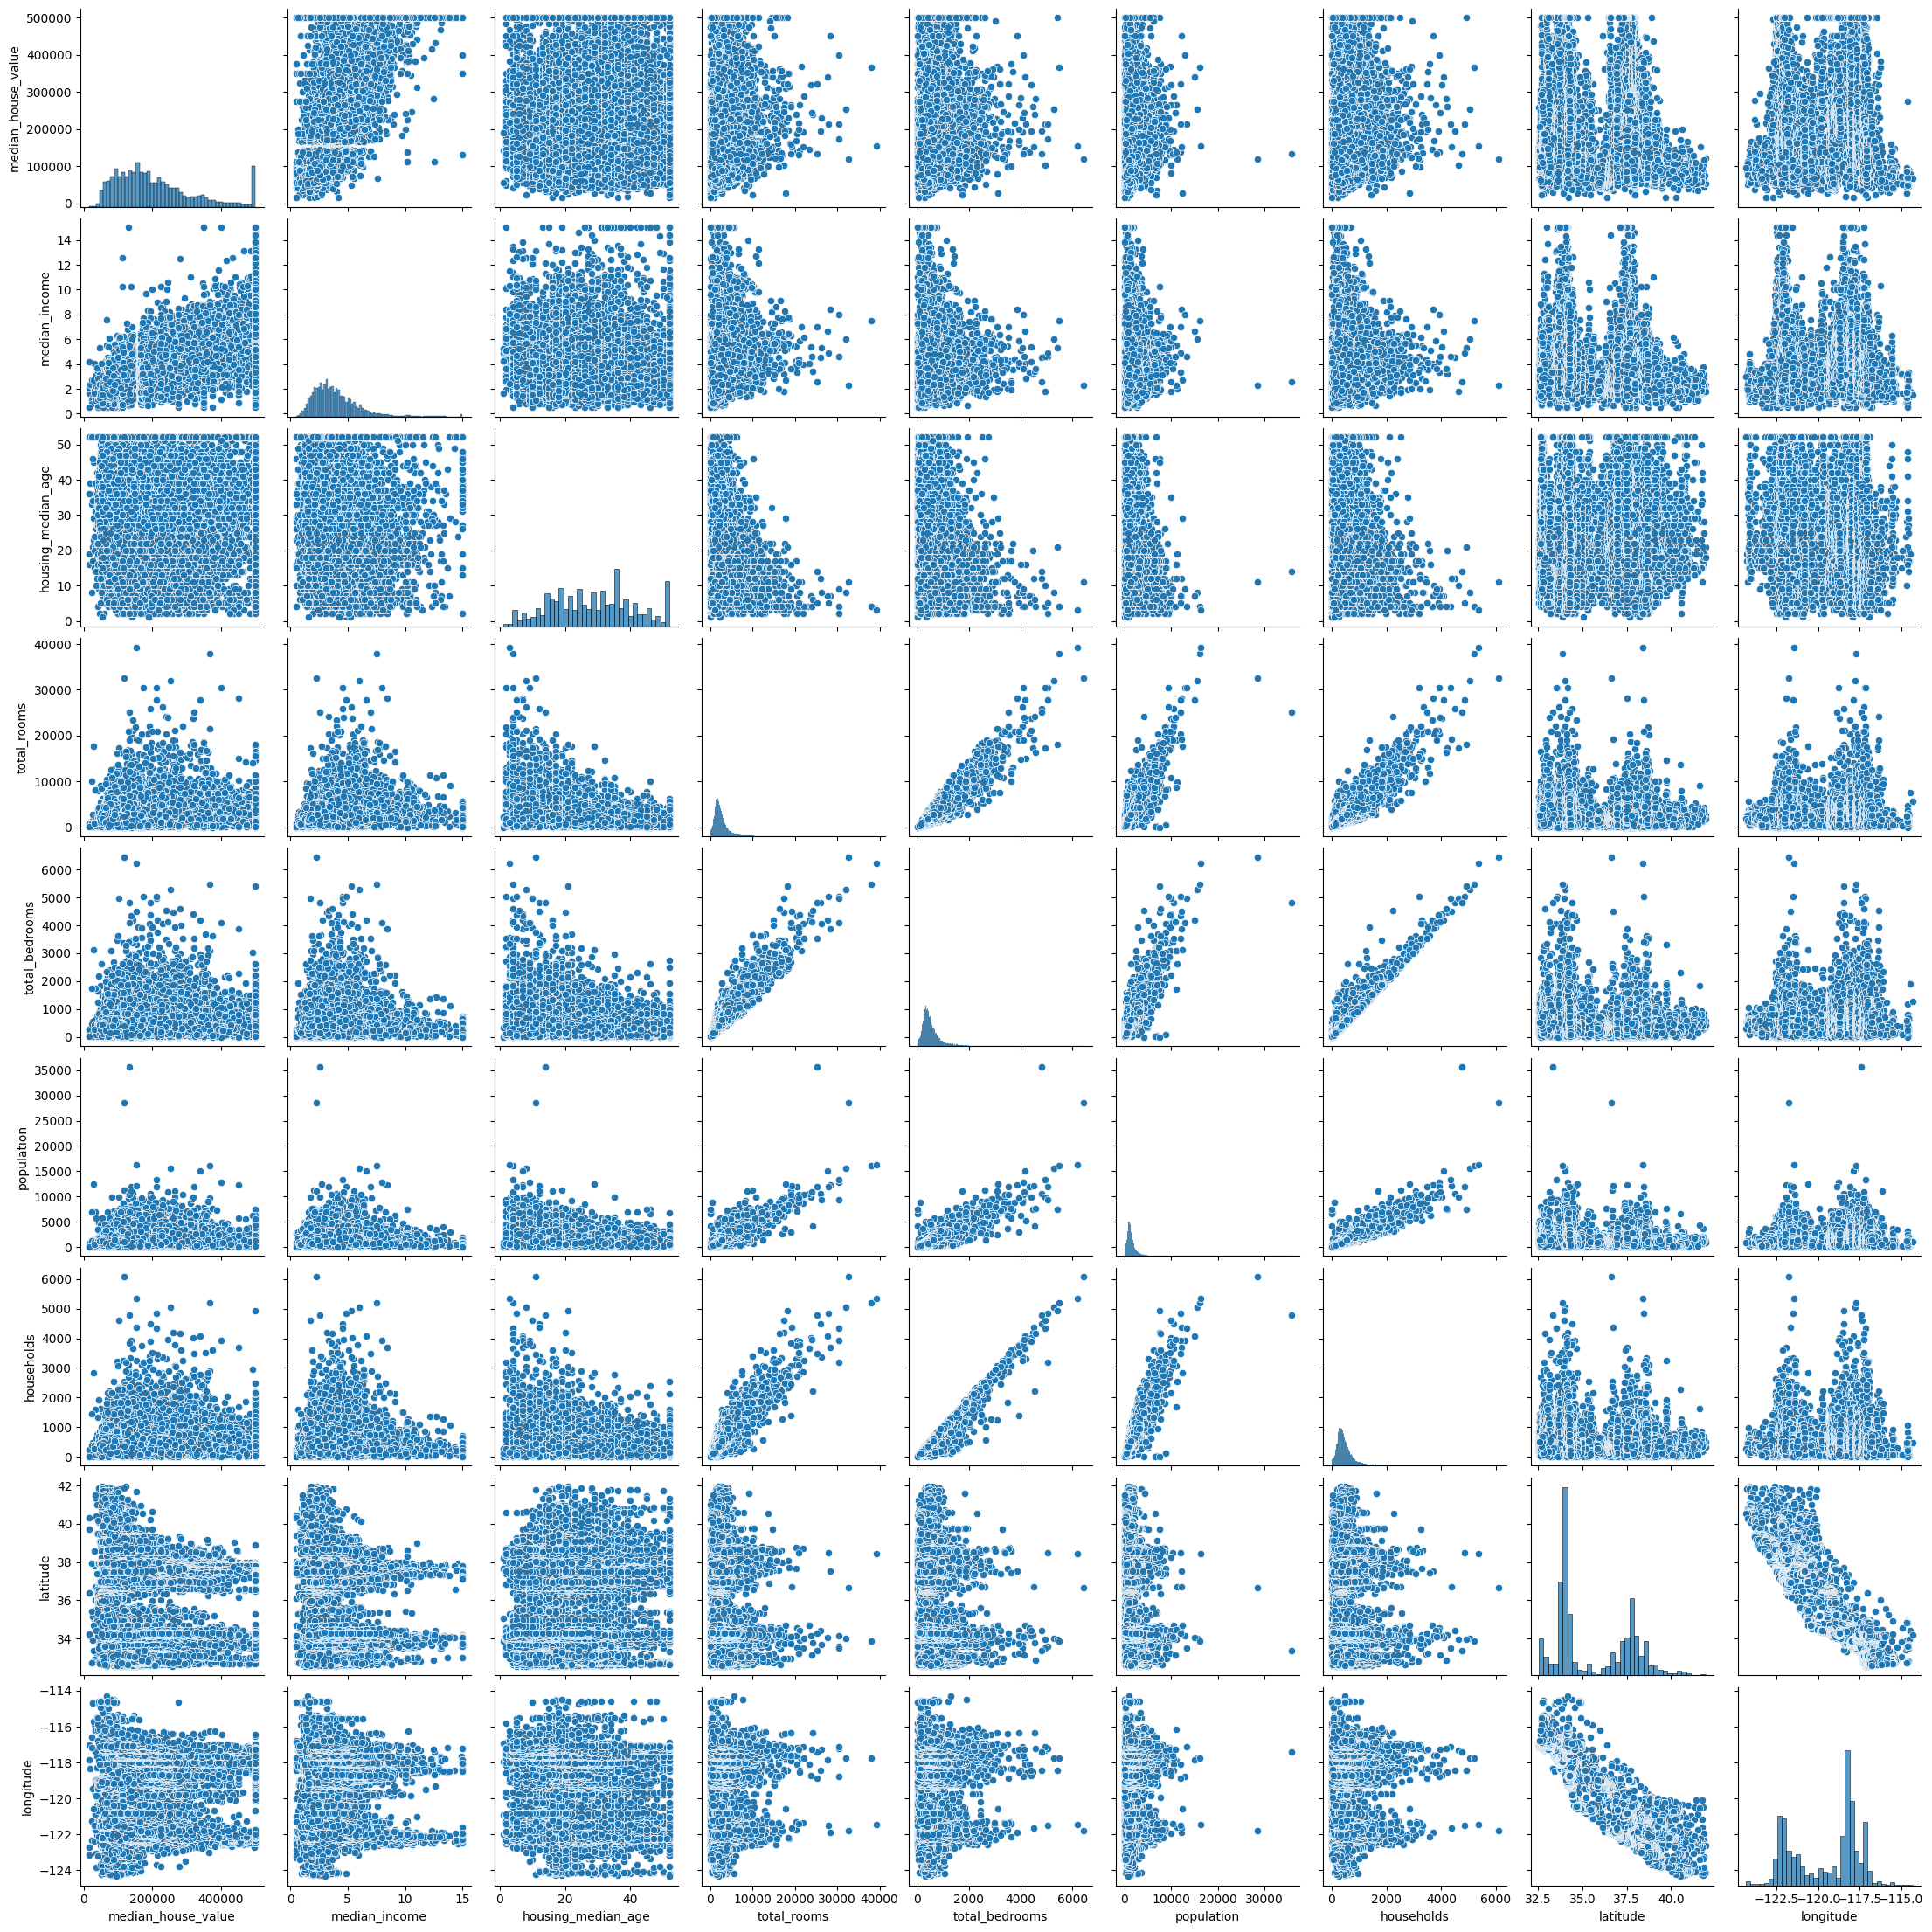

In [74]:
sns.pairplot(houses_corrupted)
houses_corrupted.describe()

### 1.3 Closer look at skewed data

To make the skew of the identified attributes more evident, below I will graph a density plot for each attribute identified.

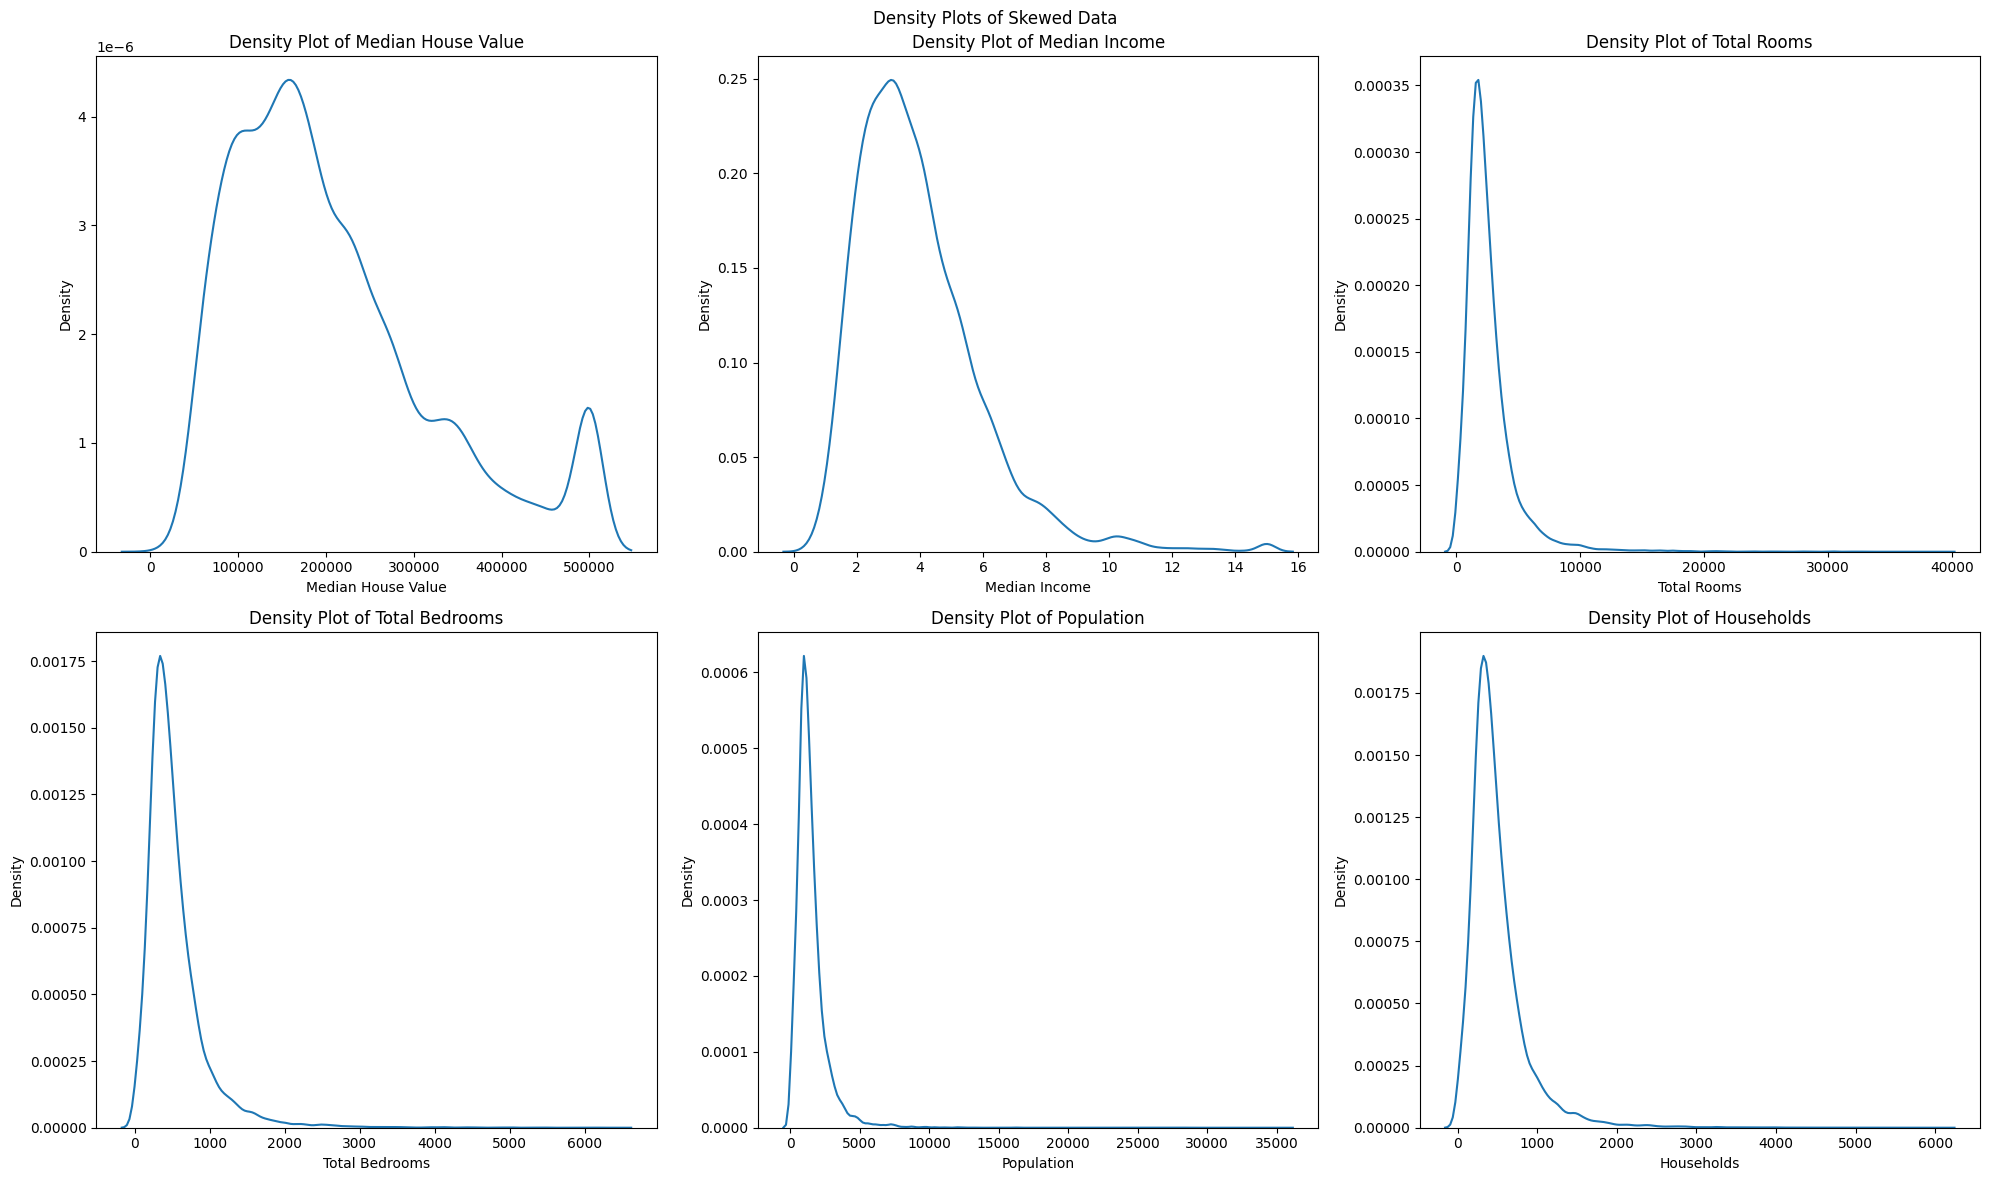

In [75]:
# Referenced from [https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8]
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Density Plots of Skewed Data')

# median_house_value
sns.kdeplot(ax=axes[0, 0], data=houses_corrupted['median_house_value'])
axes[0, 0].set_title('Density Plot of Median House Value')
axes[0, 0].set_xlabel('Median House Value')
# median_income
sns.kdeplot(ax=axes[0, 1], data=houses_corrupted['median_income'])
axes[0, 1].set_title('Density Plot of Median Income')
axes[0, 1].set_xlabel('Median Income')
# total_rooms
sns.kdeplot(ax=axes[0, 2], data=houses_corrupted['total_rooms'])
axes[0, 2].set_title('Density Plot of Total Rooms')
axes[0, 2].set_xlabel('Total Rooms')
# total_bedrooms
sns.kdeplot(ax=axes[1,0], data=houses_corrupted['total_bedrooms'])
axes[1, 0].set_title('Density Plot of Total Bedrooms')
axes[1, 0].set_xlabel('Total Bedrooms')
# population
sns.kdeplot(ax=axes[1,1], data=houses_corrupted['population'])
axes[1, 1].set_title('Density Plot of Population')
axes[1, 1].set_xlabel('Population')
#households
sns.kdeplot(ax=axes[1,2], data=houses_corrupted['households'])
axes[1, 2].set_title('Density Plot of Households')
axes[1, 2].set_xlabel('Households')
plt.tight_layout()
plt.show()

The above density plots allow you to visualise the identified skewed attributes from 1.2 closely.

The density plots agree with `median_house_value`, `median_income`, `total_rooms`, `total_bedrooms`, `population`, and `households` are heavily right-skewed. This suggests that the majority of the values are at the lower end of scale and much less on the higher end. For example, `median_income` has the majority of the value between 0 and 6 and less around 8 and 16.


Something that is interesting about these density plots is the distribution `median_house_value`. This plot would be referred to as **bimodal** meaning it has two distinct peaks. This could suggest that there could be two different clusters or groups of values [2].


### 1.4 Visulising Outliers
To better visualise the potential outliers in the dataset we can use boxplots. The **box** represents the **Interquartile Range (IQR)**. This contains the middle 50% of the data. Whereas, the **whiskers** represent the range from IQR to the **maximum** and **minimum** value within **1.5 * IQR**. Any data points that fall outside of the whiskers would be considered outliers.

From looking at the boxplots below, this outlines attributes with a large amount of potential outliers. The attributes that include outliers are:
- `median_house_value`
- `median_income`
- `total_rooms`
- `total_bedrooms`
- `population`
- `households`



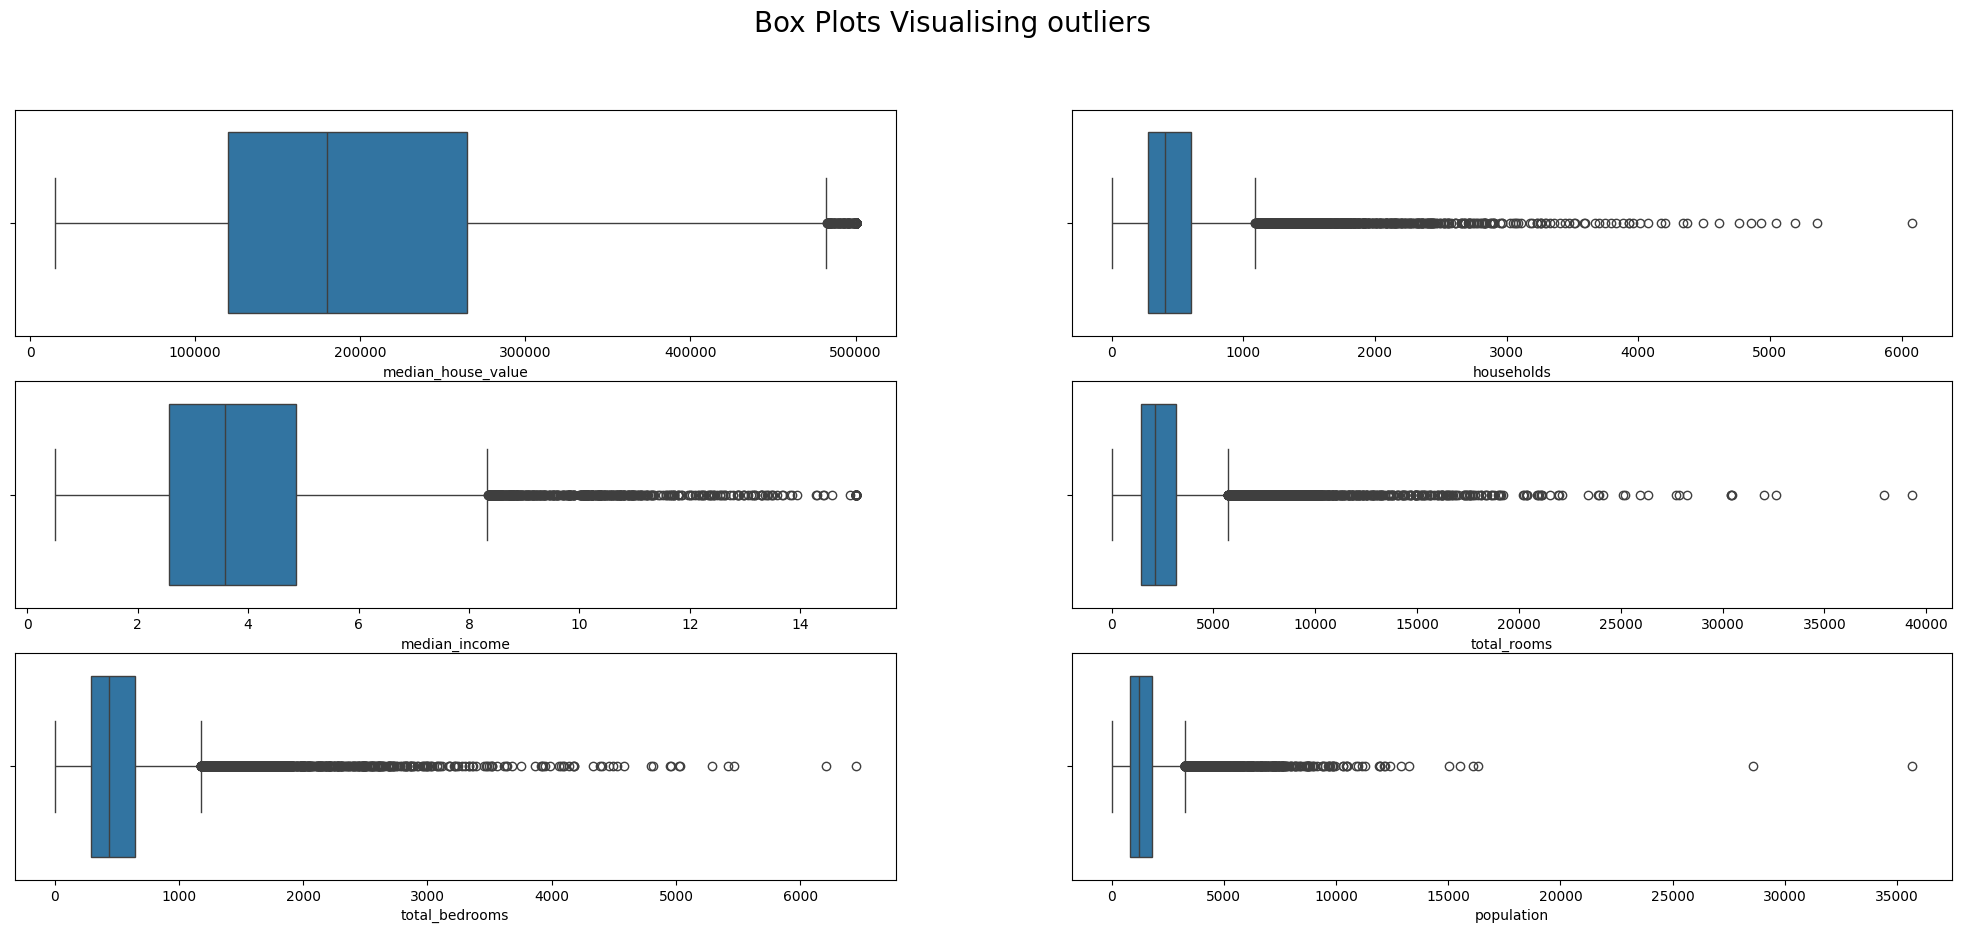

In [76]:
fig, axes = plt.subplots(3, 2, figsize=(25, 10))
fig.suptitle('Box Plots Visualising outliers', fontsize=20)

sns.boxplot(ax=axes[0, 0], x=houses_corrupted['median_house_value'])
sns.boxplot(ax=axes[0, 1], x=houses_corrupted['households'])
sns.boxplot(ax=axes[1, 0], x=houses_corrupted['median_income'])
sns.boxplot(ax=axes[1, 1], x=houses_corrupted['total_rooms'])
sns.boxplot(ax=axes[2, 0], x=houses_corrupted['total_bedrooms'])
sns.boxplot(ax=axes[2, 1], x=houses_corrupted['population'])
plt.show()

Above we can visualise the box plot. Something interesting about this is how most of the potential outliers in `median_house_value` are less spread out than other attributes. This could suggest that there was a hard limit set on median house value prices. Let's investigate this further and see how many values are hard set at `501000`.

In [77]:
# Checks to see how many values in median_house_value are set as 500001
meidan_house_values_500001 = houses_corrupted[houses_corrupted['median_house_value'] == 500001.000000]
# Checks to see how many values in median_house_value are > 500001
median_house_values_greater_500001 = houses_corrupted[houses_corrupted['median_house_value'] > 500001.000000]

# Counts the number of occurrences
num_meidan_house_values_500001 = meidan_house_values_500001.shape[0]
num_meidan_house_values_greater_500001 = median_house_values_greater_500001.shape[0]

# Prints the values
print(f"Number of values at 501000: {num_meidan_house_values_500001}")
print(f"Number of values > 501000: {num_meidan_house_values_greater_500001}")

Number of values at 501000: 965
Number of values > 501000: 0


As I thought there seems to be a hard value set for `median_house_value` prices. There are two steps I can take here, I can either remove these values, which would improve the overall distribution and skew of the data, or I could leave them in.

My opinion gravitates towards removing these data points as I don't believe they represent meaningful data as they are capped at `500001`. I will apply this when I return to the outlier detection and removal later on.

### 1.5 Average and Spread

#### Spread

This is the measure of the dispersion of data. Since some of my data is skewed and some are symmetric I will use MAD for the skewed data, and standard deviation for symmetric data.

In [78]:
filter_housing_skewed = ['median_house_value', 'median_income', 'total_rooms', 'total_bedrooms', 'population', 'households']

housing_MAD = pd.DataFrame(columns = filter_housing_skewed)
mads = []
for attribute in filter_housing_skewed:
  mad = 1.483 * abs(houses_corrupted[attribute] - houses_corrupted[attribute].median()).median()
  mads.append(mad)
housing_MAD.loc[0] = mads
print(housing_MAD)

   median_house_value  median_income  total_rooms  total_bedrooms  population  \
0            101437.2       1.660515     1181.951         241.729     670.316   

   households  
0     223.933  


Above I took the **median absolute deviation** of the identified skewed data to calculate the spread. As all attributes are less than the median values (Listed below) this indicates that the data is less spread out.

#### Average (Center of the data)

In [79]:
housing_median = pd.DataFrame(columns = filter_housing_skewed)
medians = []
for attribute in filter_housing_skewed:
  median_value = houses_corrupted[attribute].median()
  medians.append(median_value)

housing_median.loc[0] = medians
print(housing_median)

   median_house_value  median_income  total_rooms  total_bedrooms  population  \
0            179700.0         3.5724       2127.0           435.0      1227.0   

   households  
0       409.0  


Above I took the **median** of the identified skewed data in order to find the center. These values can be confirmed by looing at the centre of the peak visually in histograms. Below I will plot each attribute which was skewed and

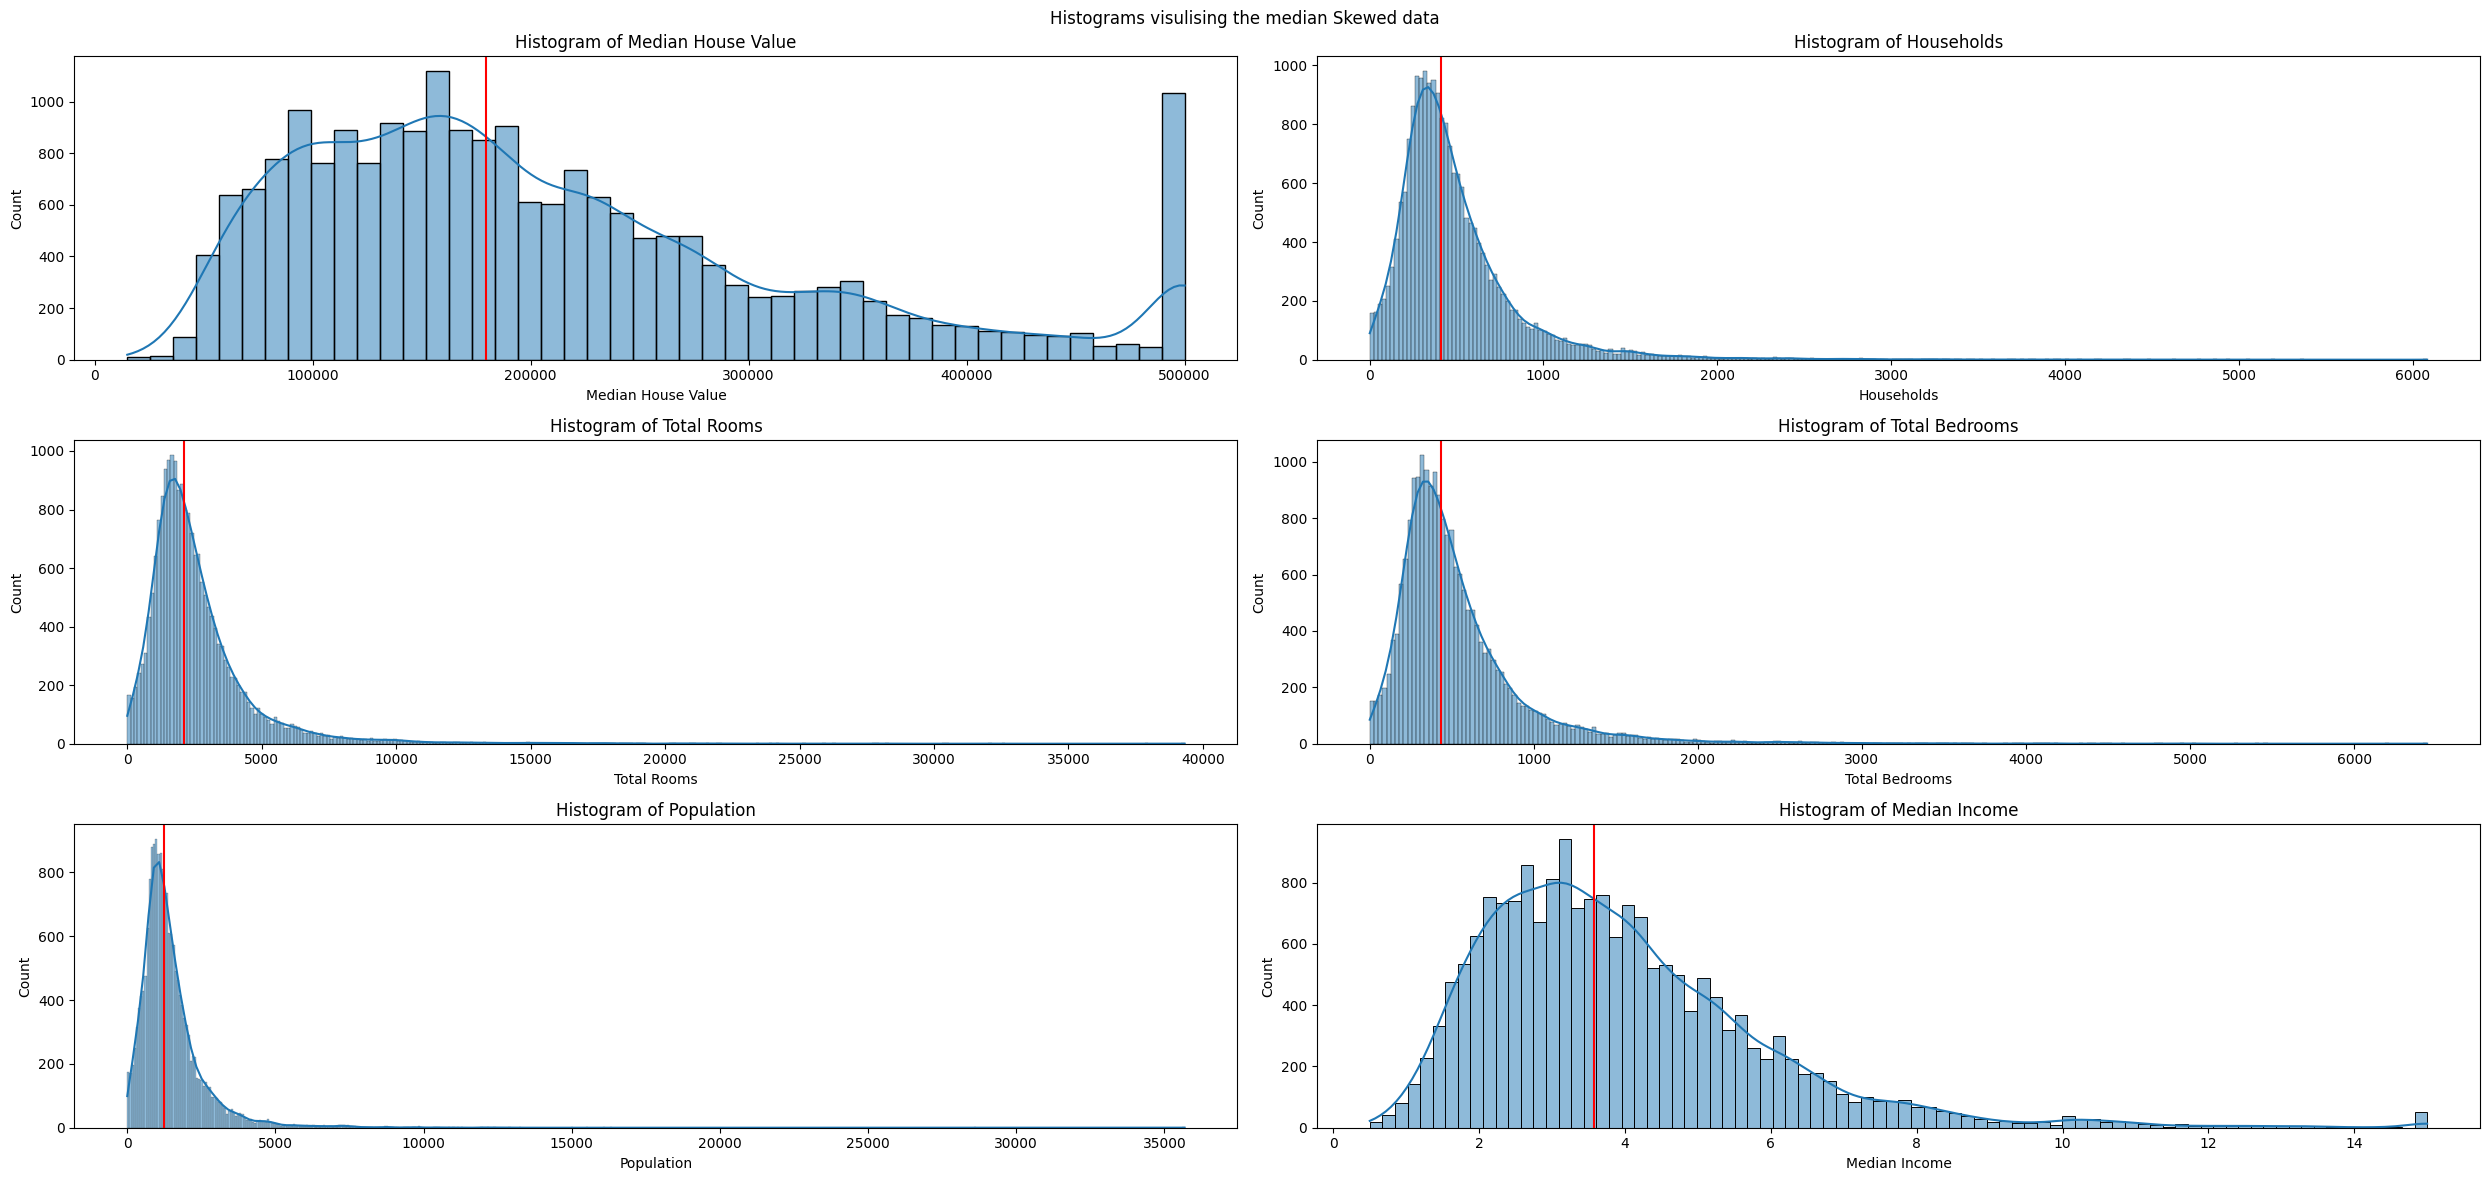

In [80]:
# axvline Referenced from [https://how2matplotlib.com/matplotlib-axvline.html]
fig, axes = plt.subplots(3, 2, figsize=(25, 12))
fig.suptitle('Histograms visulising the median Skewed data')

sns.histplot(ax=axes[0, 0], data=houses_corrupted['median_house_value'], kde=True)
axes[0, 0].set_title('Histogram of Median House Value')
axes[0, 0].set_xlabel('Median House Value')
axes[0, 0].axvline(x=houses_corrupted['median_house_value'].median(), color='r', linestyle='-', label='Median')

sns.histplot(ax=axes[0,1], data=houses_corrupted['households'], kde=True)
axes[0, 1].set_title('Histogram of Households')
axes[0, 1].set_xlabel('Households')
axes[0, 1].axvline(x=houses_corrupted['households'].median(), color='r', linestyle='-', label='Median')

sns.histplot(ax=axes[1, 0], data=houses_corrupted['total_rooms'], kde=True)
axes[1, 0].set_title('Histogram of Total Rooms')
axes[1, 0].set_xlabel('Total Rooms')
axes[1, 0].axvline(x=houses_corrupted['total_rooms'].median(), color='r', linestyle='-', label='Median')

sns.histplot(ax=axes[1,1], data=houses_corrupted['total_bedrooms'], kde=True)
axes[1, 1].set_title('Histogram of Total Bedrooms')
axes[1, 1].set_xlabel('Total Bedrooms')
axes[1, 1].axvline(x=houses_corrupted['total_bedrooms'].median(), color='r', linestyle='-', label='Median')

sns.histplot(ax=axes[2,0], data=houses_corrupted['population'], kde=True)
axes[2, 0].set_title('Histogram of Population')
axes[2, 0].set_xlabel('Population')
axes[2, 0].axvline(x=houses_corrupted['population'].median(), color='r', linestyle='-', label='Median')

sns.histplot(ax=axes[2, 1], data=houses_corrupted['median_income'], kde=True)
axes[2, 1].set_title('Histogram of Median Income')
axes[2, 1].set_xlabel('Median Income')
axes[2, 1].axvline(x=houses_corrupted['median_income'].median(), color='r', linestyle='-', label='Median')



plt.tight_layout()
plt.show()

As visualised above, taking the median of the skewed data has done a good job of finding the centre where the majority of the data lies. Taking the median was a good step to take in this case. Since the skewed data has an abundance of outliers, taking the median will estimate the central tendency more accurately. This is because the median orders the values from smallest to largest, and selects the middle value.

Whereas if the mean was taken in this example, it would sum all the values calculate the total sum and then divide by the total number of values. This approach can offset/shift the mean away from the centre as values could be very large or very little.

### 1.6 Data Correlations

In this part of the ad hoc EDA, I will explore the different relationships between attributes in the dataset by calculating their correlations.

- A value close to 1 indicates a strong positive relationship between attributes
- A value close to 0 indicates a non-linear/weak relationship between attributes
- A value close to -1 indicates a strong negative relationship between attributes

Below, I'm using the Pandas `.corr()` method to get the correlation of all attributes against each other.

In [81]:
houses_corrupted.corr()

median_house_value  median_income  housing_median_age  \
median_house_value            1.000000       0.694887            0.097929   
median_income                 0.694887       1.000000           -0.120147   
housing_median_age            0.097929      -0.120147            1.000000   
total_rooms                   0.134153       0.198818           -0.372323   
total_bedrooms                0.050594      -0.009499           -0.329757   
population                   -0.027855       0.006298           -0.305052   
households                    0.065843       0.012754           -0.312948   
latitude                     -0.144160      -0.096861            0.011372   
longitude                    -0.045967      -0.008902           -0.106438   

                    total_rooms  total_bedrooms  population  households  \
median_house_value     0.134153        0.050594   -0.027855    0.065843   
median_income          0.198818       -0.009499    0.006298    0.012754   
housing_median_age    -0.372323       -0.329757   -0.305052   -0.312948   
total_rooms            1.000000        0.929893    0.857515    0.918484   
total_bedrooms         0.929893        1.000000    0.877178    0.979829   
population             0.857515        0.877178    1.000000    0.907096   
households             0.918484        0.979829    0.907096    1.000000   
latitude              -0.036100       -0.066318   -0.107525   -0.071035   
longitude              0.044568        0.068378    0.099797    0.055310   

                    latitude  longitude  
median_house_value -0.144160  -0.045967  
median_income      -0.096861  -0.008902  
housing_median_age  0.011372  -0.106438  
total_rooms        -0.036100   0.044568  
total_bedrooms     -0.066318   0.068378  
population         -0.107525   0.099797  
households         -0.071035   0.055310  
latitude            1.000000  -0.924664  
longitude          -0.924664   1.000000

From conducting the correlation between the attributes above, it has outlined some strong positive relationships, linear/weak relationships, and strong negative relationships.

#### Positive relationships:
- `median_house_value` and `median_income` (0.694887): This positive relationship between the two attributes suggests that the higher the income, the more expensive the house tends to be. This seems logical as higher incomes allow for more expensive properties.

- `total_rooms` and `total_bedrooms` (0.929893): This is a very strong positive relationship that indicates that more rooms in a household means more bedrooms. This seems to be logically correct as households with more rooms show a tendency to have more bedrooms.

- `total_rooms` and `households` (0.918484): This strong positive relationship is expected as when the number of households increases so do the rooms. In other words, more households mean more rooms.

- `total_rooms` and `population` (0.857515): This positive relationship suggests that as the population increases so will the number of rooms. This seems logically correct as if the is a larger population, there will need to be more rooms to accommodate it.

- `total_bedrooms` and `households` (0.979829): Similarly to total_rooms and households, this strong positive relationship is expected as when the number of households increases so will the number of bedrooms.

- `total_bedrooms` and `population` (0.877178): Similarly to total_rooms and population, this reflects the same concept, as the population increases so will the need for more bedrooms.

#### Negative Relationships:
- `housing_median_age` and `total_rooms` (-0.372323): This negative relationship seems to suggest that older houses tend to have less rooms. This could be explored further to determine why this is the case.

- `hosuing_median_age` and `population` (-0.305052): This negative relationship suggests that as the median age of houses increases the population will decrease. This could suggest that areas with older houses are associated with lower population rates.

- `housing_median_age` and `households` (-0.312948): This negative relationship suggests that as the housing median age increases there are less households in that particular area. This could be linked to `houseing_median_age` and `population` as if there's less/declining population in that area, there would be less need for houses and therefore less households.

#### Non-Linear Relationships:

- `median_house_value` and `total_bedrooms` (0.050594): This weak/non-linear relationship suggests that there seems to be no relation between house price and the number of bedrooms that are in the household. This is an interesting find as you could expect more expensive households to have more bedrooms.

- `median_house_value` and `population` (-0.027855): This weak/non-linear relationship suggests that population doesn't play a role in determining house prices. This is also an interesting find as one could expect areas with larger populations would increase household costs due to demand. This could be explored more to find out which factors affect house prices such as location.

- `median_income` and `population` (0.006298): This weak/non-linear relationship suggests that an increase in population has minimal affect on median income. This could be explored further to see what factors influence median income such as area or employment rates.

#### Interesting finds:

- One interesting correlation I observed was `median_house_value` and `total_bedrooms`. One could expect as the value of a house increases so would the total number of bedrooms. Although this isn't the case, the correlation between these two variables showed a weak positive relationship which suggests that the value of a household didn't affect how many total bedrooms there are. Since house value isn't affected by the number of bedrooms and vice versa. This could stipulate that other factors could affect the median house value such as property size of the household, neighbourhood, or crime rates. These different elements could be analysed further to understand what changes house values significantly.

- Another interesting find was `housing_median_age` and `households`. This correlation suggested that as the housing median age increased there were less households in a particular area. As mentioned above I noticed a relation between `housing_median_age` and `population` which suggested that if there were less people or a decline in population, there would be less demand for new housing. Although this seems logically correct, other elements could contribute to less households in areas with aged housing.

- Lastly, `housing_median_age` and `total_rooms` returned a negative correlation suggesting older houses had less rooms. This was also a similar result to `housing_median_age` and `total_bedrooms` (-0.329757) which suggested less bedrooms were in older housing. All this suggests a smaller layout within the household. This could be explored further to determine what caused older households to have less rooms.


#### Scatter plot showing positive correlations

Text(0.5, 1.0, 'Total Bedrooms vs Population')

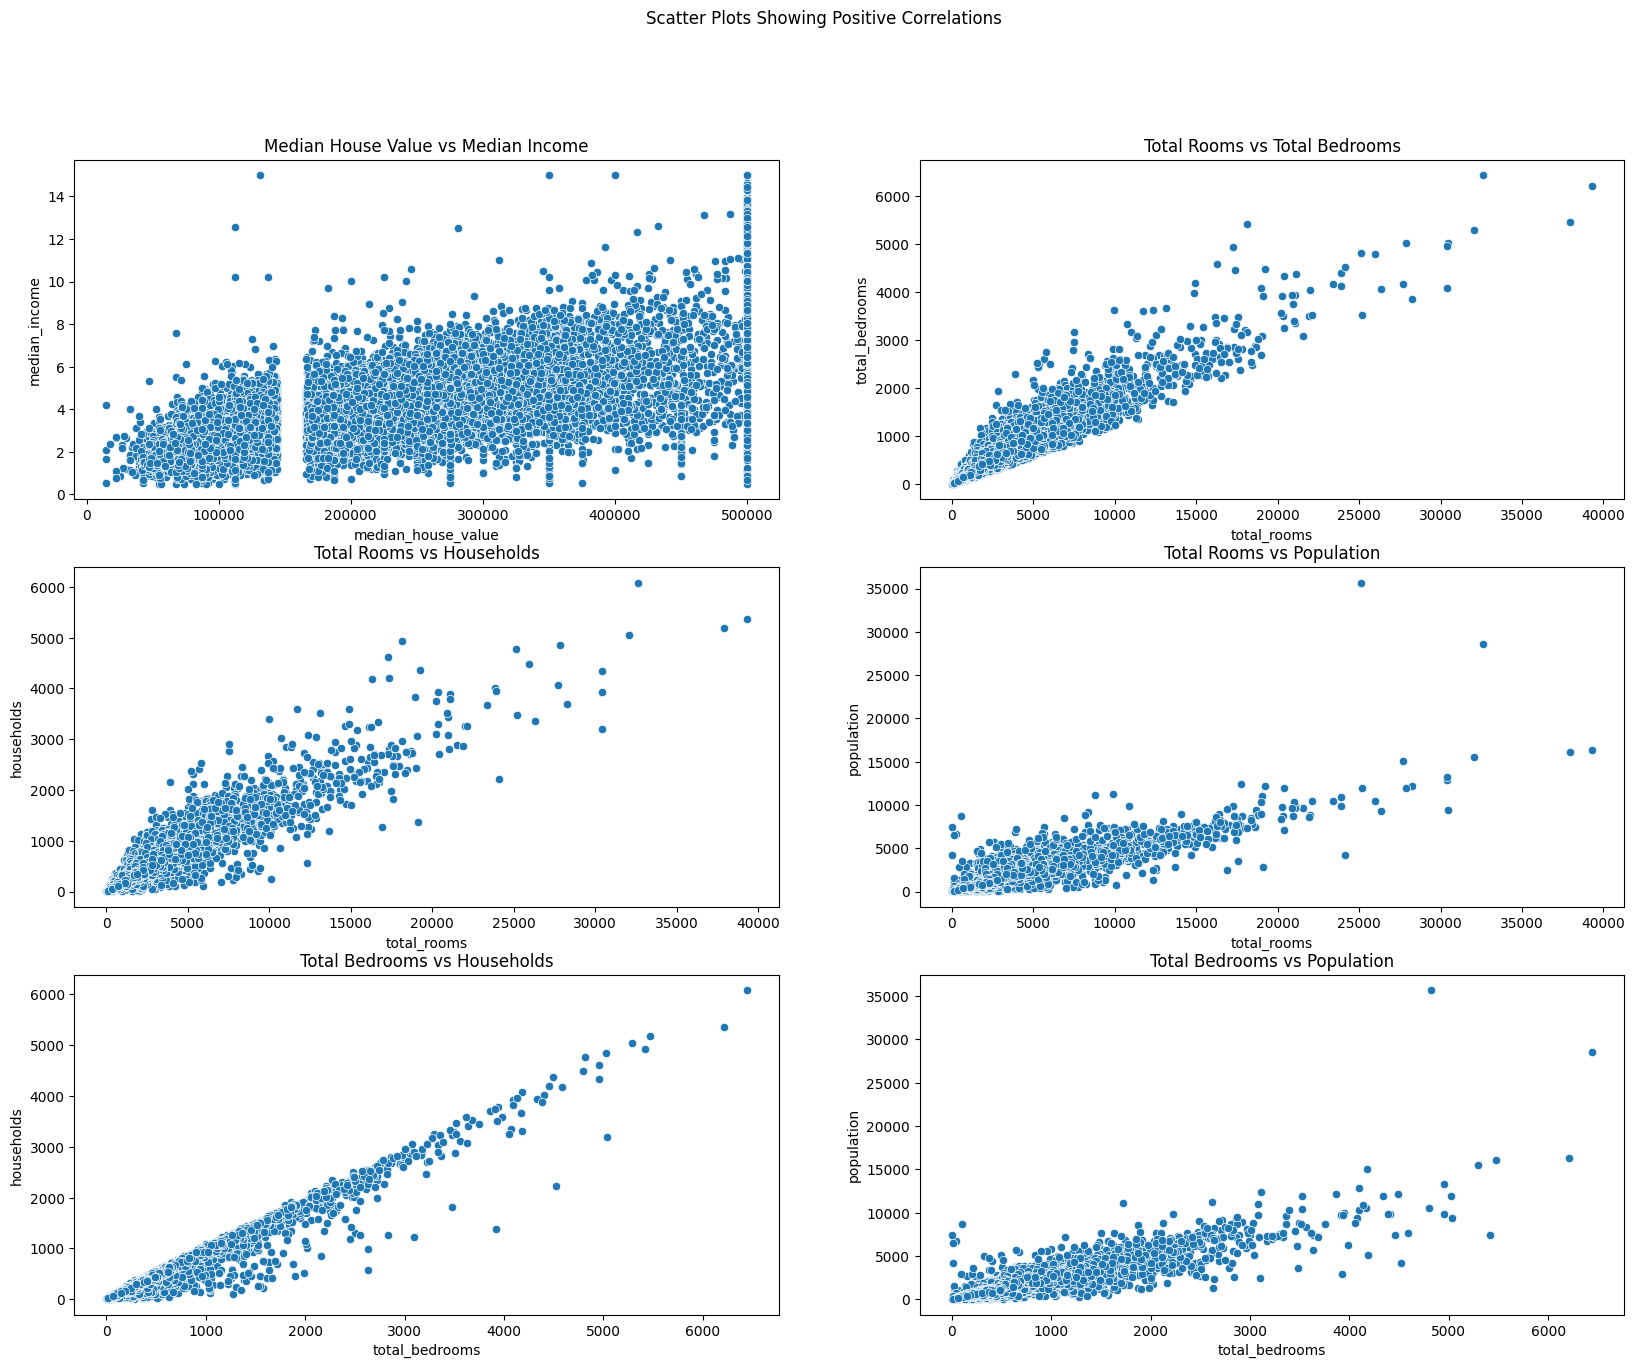

In [82]:
# Positive correlation scatter plots
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Scatter Plots Showing Positive Correlations')
sns.scatterplot(ax=axes[0, 0], data=houses_corrupted, x='median_house_value', y='median_income')
axes[0, 0].set_title('Median House Value vs Median Income')

sns.scatterplot(ax=axes[0, 1], data=houses_corrupted, x='total_rooms', y='total_bedrooms')
axes[0, 1].set_title('Total Rooms vs Total Bedrooms')

sns.scatterplot(ax=axes[1, 0], data=houses_corrupted, x='total_rooms', y='households')
axes[1, 0].set_title('Total Rooms vs Households')

sns.scatterplot(ax=axes[1, 1], data=houses_corrupted, x='total_rooms', y='population')
axes[1, 1].set_title('Total Rooms vs Population')

sns.scatterplot(ax=axes[2, 0], data=houses_corrupted, x='total_bedrooms', y='households')
axes[2, 0].set_title('Total Bedrooms vs Households')

sns.scatterplot(ax=axes[2, 1], data=houses_corrupted, x='total_bedrooms', y='population')
axes[2, 1].set_title('Total Bedrooms vs Population')

#### Scatter plot showing Negative correlations

Text(0.5, 1.0, 'Housing Median Age vs Households')

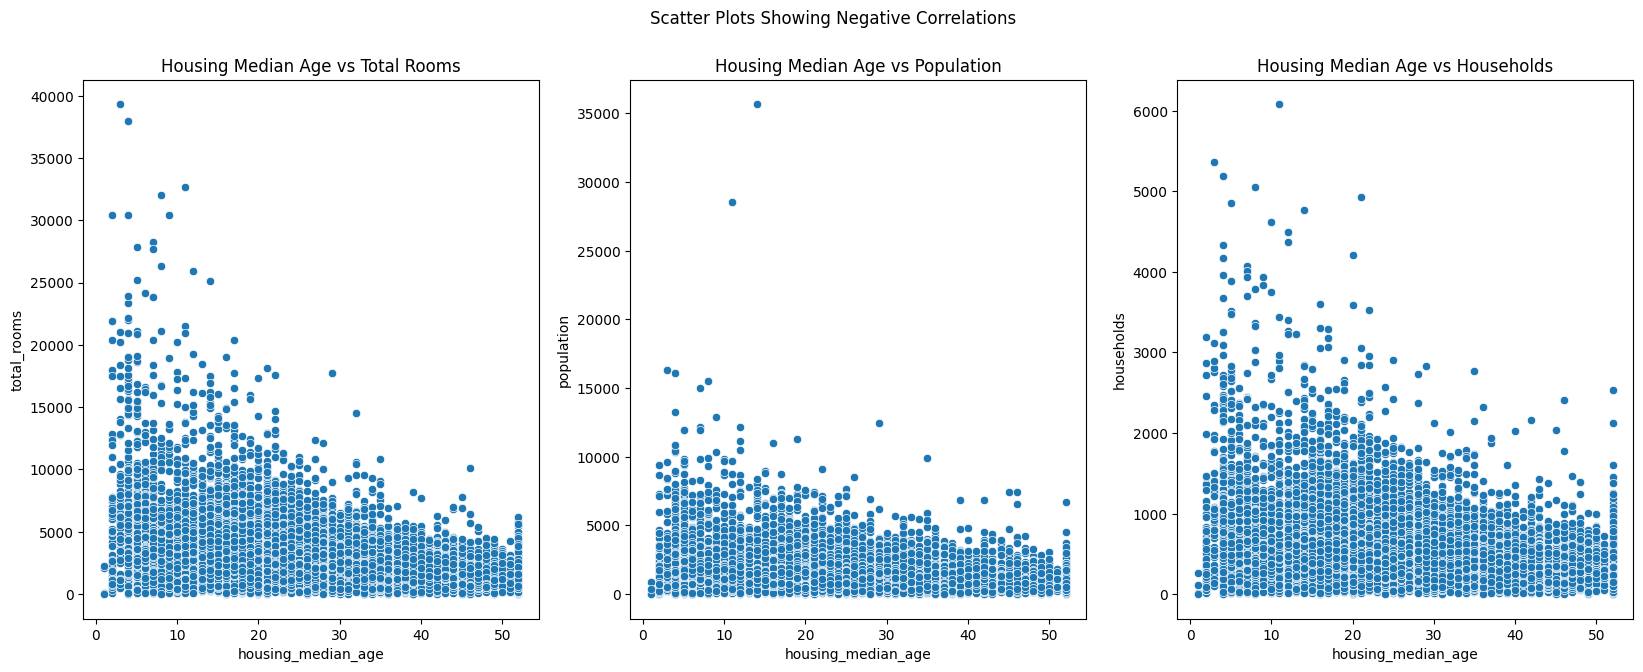

In [83]:
# Negative correlation scatter plots
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Scatter Plots Showing Negative Correlations')
sns.scatterplot(ax=axes[0], data=houses_corrupted, x='housing_median_age', y='total_rooms')
axes[0].set_title('Housing Median Age vs Total Rooms')

sns.scatterplot(ax=axes[1], data=houses_corrupted, x='housing_median_age', y='population')
axes[1].set_title('Housing Median Age vs Population')

sns.scatterplot(ax=axes[2], data=houses_corrupted, x='housing_median_age', y='households')
axes[2].set_title('Housing Median Age vs Households')


#### Scatter plot showing Non-Linear correlations

Text(0.5, 1.0, 'Median Income vs Population')

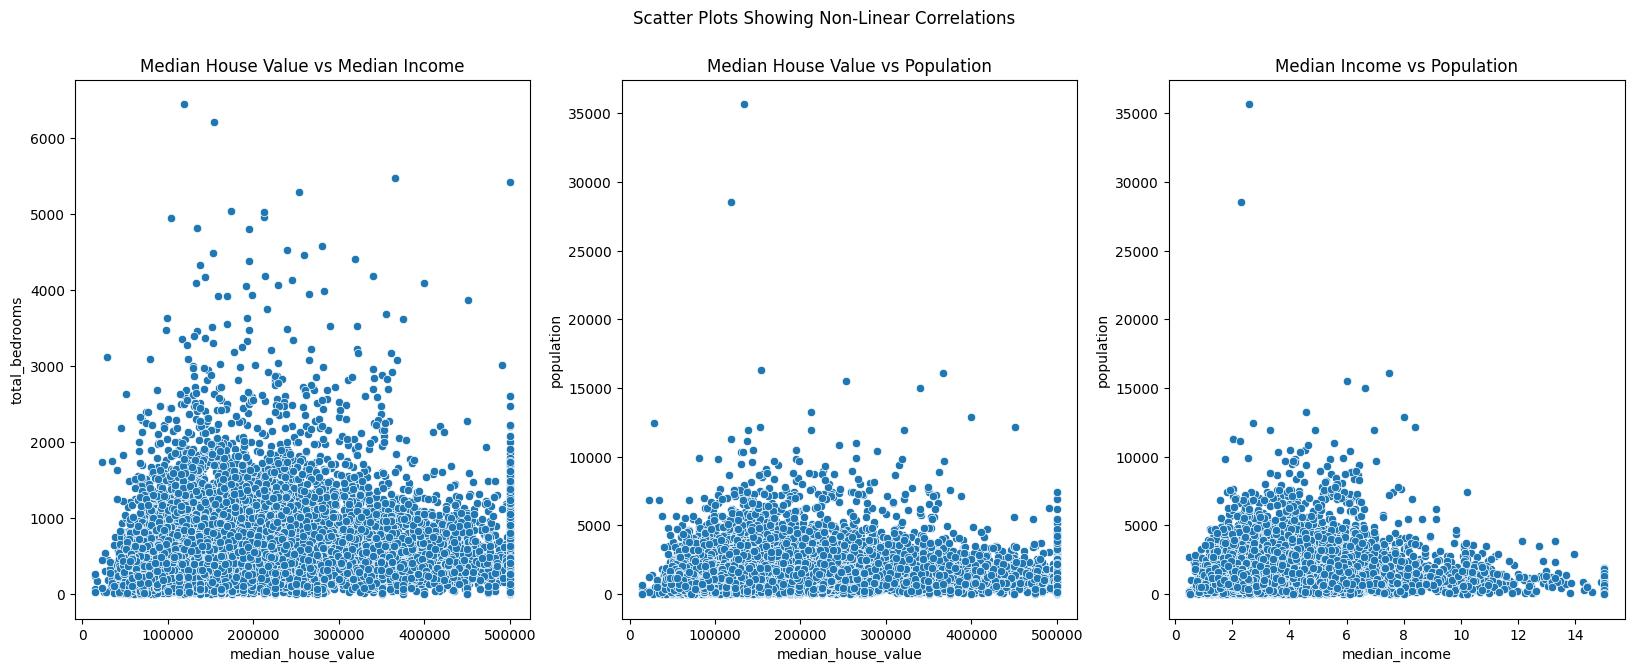

In [84]:
# Non-linear relationships
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Scatter Plots Showing Non-Linear Correlations')
sns.scatterplot(ax=axes[0], data=houses_corrupted, x='median_house_value', y='total_bedrooms')
axes[0].set_title('Median House Value vs Median Income')

sns.scatterplot(ax=axes[1], data=houses_corrupted, x='median_house_value', y='population')
axes[1].set_title('Median House Value vs Population')

sns.scatterplot(ax=axes[2], data=houses_corrupted, x='median_income', y='population')
axes[2].set_title('Median Income vs Population')


## 2. Outlier Detection

### Utilise a statistical outlier detection approach (Robust Z-Score)



Below I have implemented the Robust Z-Score outlier detection method. I decided to choose this method as it is reliable when outliers are present. Instead of using mean and standard deviation like in the traditional Z-Score which is not robust to influence from outliers, resulting in a flawed z-score metric if the data is not normal [3], the Robust Z-Score uses MAD and Median which is more robust against extreme values. Therefore, the accuracy when detecting outliers will be much greater.

**The robust Z-Score is calculated:**
$$
robz_i = \frac{x_i - med(x)}{MAD}
$$


Threshold: A threshold needs to be set to determine what is and what isn't an outlier. The threshold was set as `threshold = 3`, this means that an outlier will be detected if the absolute value of the robust z-score is greater than 3.


In [85]:
# Creates a copy of corrupted dataframe for analysis
houses_corrupted_robz = houses_corrupted.copy()
# Features used to test for outliers
attributes = ['median_house_value', 'median_income', 'housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households', 'longitude', 'latitude']

# Threshold set to 3, if rob_z score goes over 3 will be outlier
threshold = 3


def outlier_detection_z_score(dataframe, threshold, attributes):
  # Keeps track of the total outliers
  total_outliers = 0
  for attribute in attributes:
    # Calculates the mad Referenced from [https://colab.research.google.com/drive/1xy80zVDKkXcWnkVjAwtWHvyZxarExaQj#scrollTo=ntqoOX6_1IC6]
    mad = 1.483 * abs(dataframe[attribute] - dataframe[attribute].median()).median()
    # Calculates the robust z score Referenced from [https://ncl.instructure.com/courses/55046/pages/lecture-3?module_item_id=3511620]
    rob_z = (dataframe[attribute] - dataframe[attribute].median()) / mad
    # Creates a column with either true or false for outlier detection
    dataframe[f'Outlier_{attribute}'] = rob_z.abs() > threshold
    # calculates the number of outliers for each attribute
    outliers_count = (rob_z.abs() > threshold).sum()
    # calculates all the outliers in all attributes
    total_outliers += outliers_count
    # Prints the number of outliers for each attribute
    print(f"Outliers Robust Z-Score {attribute}: {outliers_count}")
  print(f"Total Outliers Robust Z-Score: {total_outliers}")



outlier_detection_z_score(houses_corrupted_robz, threshold, attributes)

Outliers Robust Z-Score median_house_value: 1058
Outliers Robust Z-Score median_income: 495
Outliers Robust Z-Score housing_median_age: 0
Outliers Robust Z-Score total_rooms: 1309
Outliers Robust Z-Score total_bedrooms: 1325
Outliers Robust Z-Score population: 1086
Outliers Robust Z-Score households: 1253
Outliers Robust Z-Score longitude: 17
Outliers Robust Z-Score latitude: 521
Total Outliers Robust Z-Score: 7064


From the results produced, we can see that `median_house_value`, `median_income`, `total_rooms`, `total_bedrooms`, `population`, `households`, `longitude`, and `latitude` included outliers with a total of 7064 outliers detected. Outliers detected in longitude and latitude can be ignored as these represent the geographical locations of houses and are most likely not anomalies in the dataset.

However, the other features such as `median_house_value`, `median_income`, `total_rooms`, `total_bedrooms`, `population`, and `households` align with what we observed in the earlier Ad Hoc EDA. For example, `median_house_value` that ranges from `14999.000000` to `500001.000000` with a median of `179700.000000` and mean of `206855.816909` indicated right skew which. This skewed data suggested there could be potential outliers present which is confirmed after outlier detection with robust z-score.

As expected `housing_median_age` has 0 outliers present. As mentioned earlier it ranges from `1.000000` to `52.000000` with a median of `28.000000` and a mean of `28.324182`. This means it has a relatively symmetric distribution and aligns with our earlier Ad Hoc EDA where we mentioned that it should have no significant outliers.

### Utilise an algorithmic outlier detection method (Isolation Forest)


As my algorithmic approach, I decided to use Isolation Forest. I decided to use **Isolation Forst** because it looks for data points that look normal to the rest (Inlier) and looks for data points that look abnormal to the rest (Outlier). As summed up by Li-Hsiang Hsu "Isolation Forest is highly scalable and computationally efficient, making it suitable for analyzing large datasets with skewed distributions and heavy tails."[4]. Therefore, Isolation Forest will work well for this type of data set because it has heavily skewed data.

To set up Isolation Forest I first made a copy of the corrupted dataset using `.copy()` method and removed all the rows with missing data using `dropna()` method as Isolation Forest can't handle missing values. Additionally, I decided to drop the columns `longitude` and `latitude` as these represent the geographical locations of houses and are most likely not outliers.

Next, I initilised the Isolation Forest model. I set the `contamination=0.05` this will identify the top 5% of the identified outliers without being too strict.

Next, I trained the model with `.fit()` and made two new columns in the data frame that has the models `anomaly_scores` and `anomaly_labels`.
- Anomaly scores is a value assigned to each data point, it represents its likelihood of being an outlier or not. Lower scores indicate that it's more likely to be an outlier and higher scores suggest it's likely an inlier.
- Anomaly labels: These are what determine if it's an inlier or an outlier. **-1** determines that it is an **outlier** and **1** determines it to be an **inlier**

In [86]:
# Code adapted from [https://www.youtube.com/watch?v=O9VvmWj-JAk&t=253s&ab_channel=AndyMcDonald]
from sklearn.ensemble import IsolationForest

houses_cleaned = houses_corrupted.copy().dropna().drop(columns=['longitude', 'latitude'])
full_set= houses_cleaned.values
# Initilise the model
model_IF = IsolationForest(contamination=0.1, random_state=42)
# Train the model
model_IF.fit(full_set)


# adds anomaly scores and anomaly labels to the dataset
houses_cleaned['anomaly_scores'] = model_IF.decision_function(full_set)
houses_cleaned['anomaly_labels'] = model_IF.predict(full_set)

num_outliers = (houses_cleaned['anomaly_labels'] == -1).sum()
print(f"Number of outliers Isolation Forest: {num_outliers}")
houses_cleaned.loc[:, ['anomaly_scores', 'anomaly_labels']].head(10)



Number of outliers Isolation Forest: 1506


anomaly_scores  anomaly_labels
0        -0.016827              -1
1        -0.022160              -1
4         0.087167               1
5         0.073668               1
6         0.108765               1
7         0.087234               1
8         0.115167               1
9         0.086490               1
11        0.081235               1
12        0.111007               1

Looking at these results **Isolation Forest** detected a total of **1506** outliers. Looking at the table that was produced it shows the first 10 values with `anomaly_scores` and `anomaly_labels`.

An **anomaly label** with 1 indicates an inlier and an anomaly label with -1 indicates an outlier. **Anomaly score** ranks each row where the lower values indicate that it is an outlier and higher values indicate it is an inlier.

### Compare results and decide what to do with identified outliers

#### Comparison of Robust Z-Score & Isolation Forest

When comparing both Isolation Forest and Robust Z-Score, we can see that both methods target different types of outliers.

- Robust Z-Score focuses on **Univariate Anomalies** which are detecting outliers in each feature independently. Whereas Isolation Forest focuses on **Multivariate Anomalies** which are anomalies detected by multiple features at once.

- Robust Z-Score found a significantly higher number of anomalies: **7064** in total, compared to Isolation Forest which only detected a total of **1506**.

- Robust Z-Score is based on a **Threshold** to determine its outliers, where if a data point exceeds that threshold it will be classified as an outlier, however, Isolation Forest detects outliers based on an **Anomaly Score**.

Let us compare the results by visualising the results for each method on a pair plot, this will help us understand how both methods approach anomaly detection.

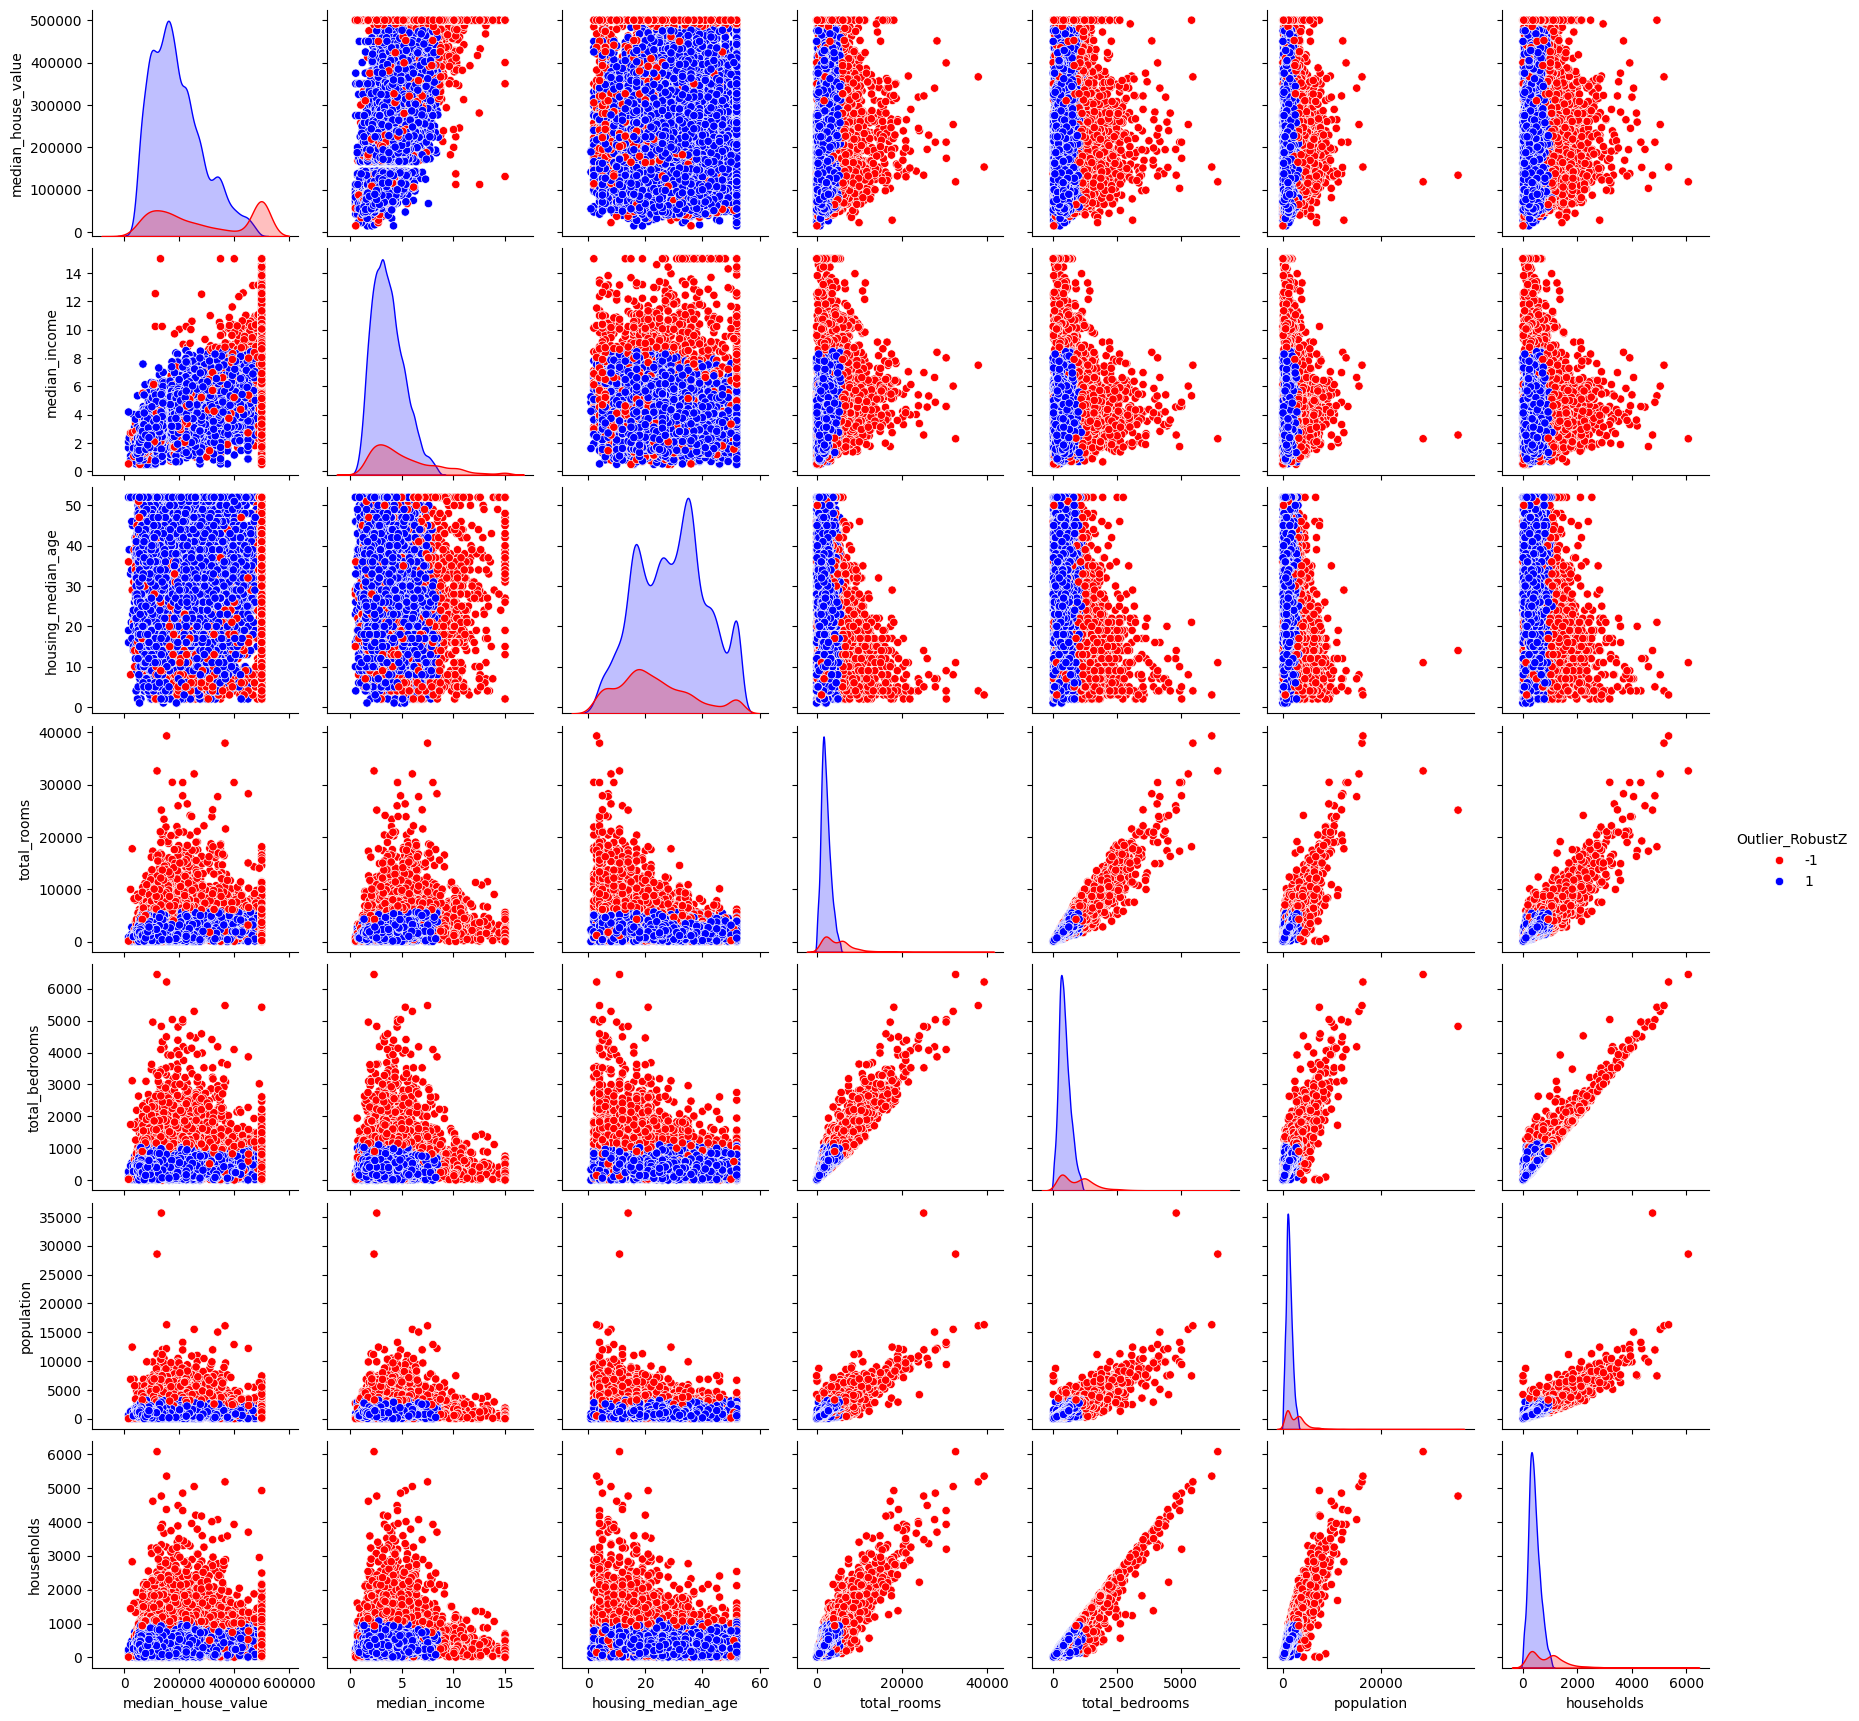

In [87]:
# creates a new column Outlier_RobustZ and assigns 1 for rows without outliers and -1 for rows with outliers
houses_corrupted_robz['Outlier_RobustZ'] = np.where(houses_corrupted_robz[[f'Outlier_{attribute}' for attribute in attributes]].any(axis=1), -1, 1)

cols = ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']
sns.pairplot(data=houses_corrupted_robz, vars=cols, hue='Outlier_RobustZ', palette={1: 'blue', -1: 'red'})

The above shows a pair plot for the Robust Z-Score anomaly detection. Blue points are the inliers whereas red points represent outliers. We can see that Robust Z-Score handles a lot of extreme and global outliers very well. For example, in the plot that is `medan_house_value` Vs. `median_income` it captures most if not all of the values that were capped at `500001.000000`.

The reason Robust Z-Score highlights these data points as outliers is because they fall outside of 3 median absolute deviations away from the median. For example, since the median of `median_house_value` is `179700.000000`, `500000.000000` falls outside of 3 median absolute deviations away from the median for their values and therefore they are highlighted as outliers.

The statistical nature of Robust Z-Score really shows in these pair plots where it clearly isolates extreme values across multiple features.

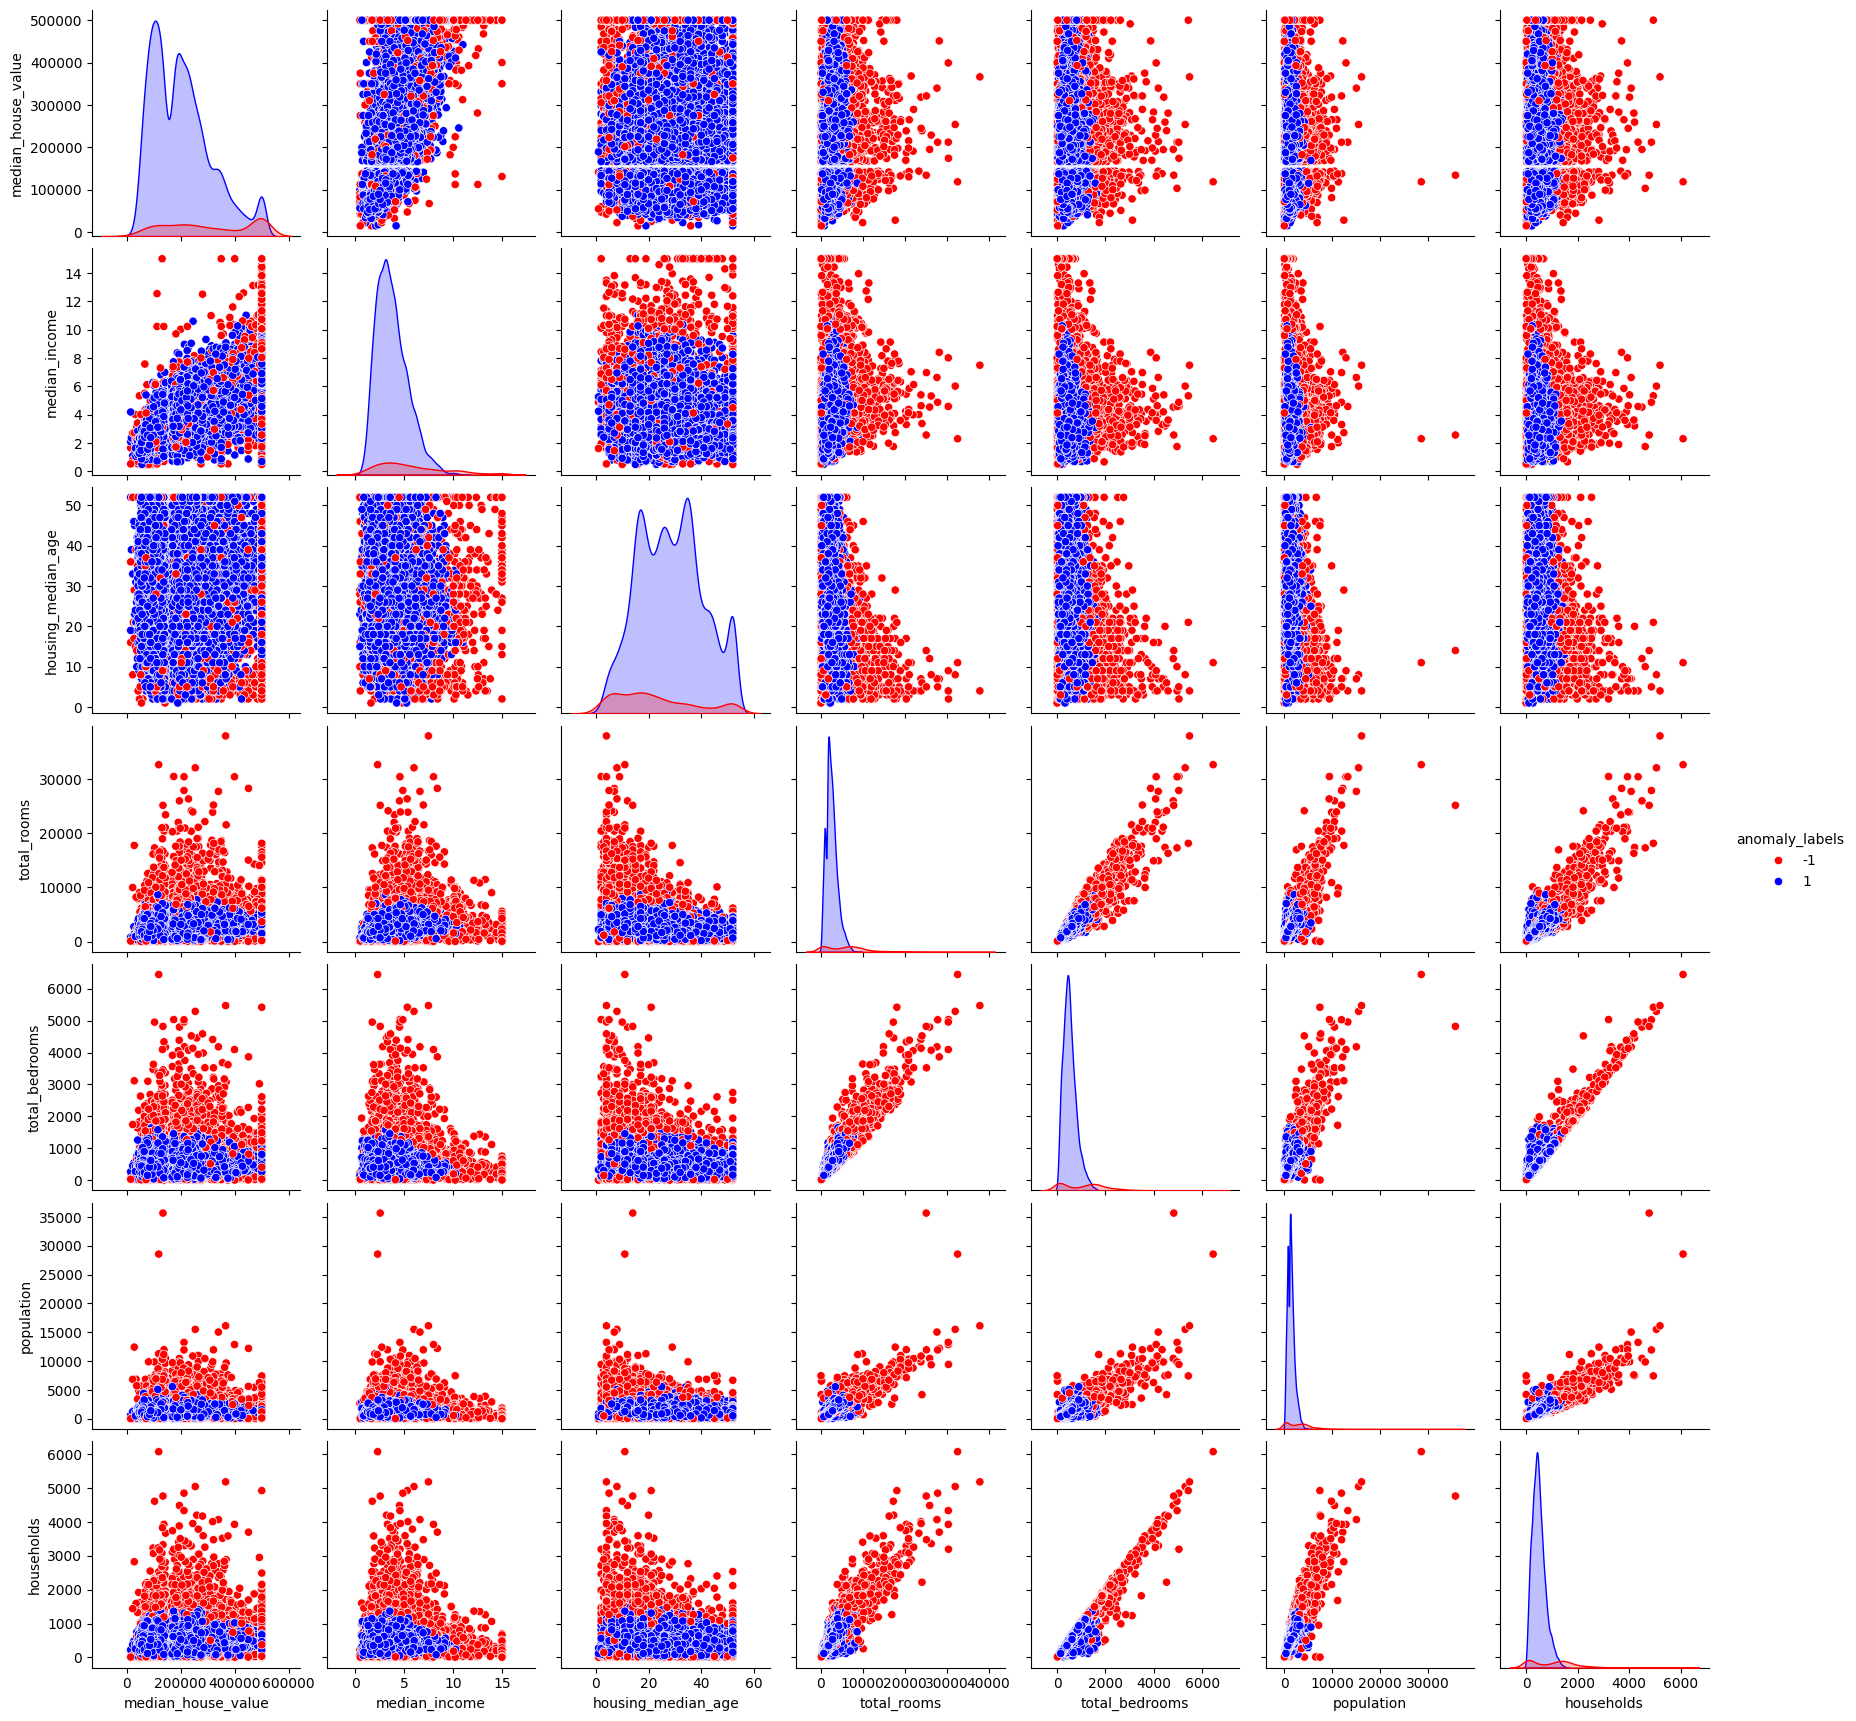

In [88]:
cols=['median_house_value', 'median_income', 'housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households']
sns.pairplot(data=houses_cleaned, vars=cols, hue='anomaly_labels', palette={1: 'blue', -1: 'red'})

The above shows a pair plot for the Isolation Forest anomaly detection. Blue points are the inliers whereas red points represent outliers. From looking at the pair plot we can visualise pairwise relationships between all the attributes as well as density plots when the attribute intersects with itself.

Similar to the Robust Z-Score method, Isolation Forest captures the global outliers very accurately. It seems to have taken a different approach when tackling the higher values. Instead of the Robust Z-Score method that uses statistics (Median and MAD) to capture the outliers, Isolation Forest uses machine learning techniques to capture outliers based on how isolated a data point is based on all features.

### Handling outliers

When deciding how to handle these outliers, I took into consideration different techniques:

1. **Retaining the outliers:** These outliers could include important and real-world observations. I looked back at the 5 number-summary and went over the values again. After taking a look I noticed that `median_house_value` contained the minimum value of `14999.000000` which stands out and seemed unrealistic for housing prices in California. Therefore, I decided not to go with this method.

2. **Removing outliers:** This seems like the best approach. However, when deciding which method to use out of Robust Z-Score and Isolation Forest I need to look at the metrics and the ways that Robust Z-Score and Isolation Forest handle outliers.
  -  Using Robust Z-Score could significantly reduce the size of my data set as it detected 7064.
  - Using Isolation Forest only detected 1506 outliers, therefore my data set wouldn't be reduced as drastically as Robust Z-Score.
  - Since Isolation Forest uses multivariate anomaly detection, it's more likely that the detected outliers are inconsistent with all features, rather than the extreme outliers detected by the Robust Z-Score univariate method.

**Final Decision:**
- I have decided to use Isolation Forest. This is because it captures the Multivariate relationships across all attributes and also retains more of the data compared to Robust Z-Score. Additionally, I will remove the remaining `500001.000000` values from `median_house_value` not captured by Isolation Forest as these capped values will still likely cause some skew in my data and I find them to be meaningless data as explained earlier.

In [89]:
# Removes the outliers
houses_no_outliers = houses_cleaned[houses_cleaned['anomaly_labels'] == 1]
# Removes the capped values
houses_no_outliers = houses_no_outliers[houses_no_outliers['median_house_value'] != 500001]


## 3. Imputation


In [90]:
from sklearn.model_selection import (
    train_test_split,
)

from sklearn.metrics import (
    root_mean_squared_error,
    r2_score,
)

from sklearn.linear_model import (
    LinearRegression,
)

# Use this dataset for comparison against the imputed datasets
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

When deciding which features should be imputed and which should be removed, I will first check the individual features to see if they are missing more or less than 30% of the data. If they are missing more than 30% of the data I will remove the feature.

In [91]:
# Code adapted from [https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset]
percent_missing = houses_corrupted.isnull().sum() * 100 / len(houses_corrupted)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

print(missing_value_df)

                    percent_missing
median_house_value              0.0
median_income                  10.0
housing_median_age             10.0
total_rooms                     0.0
total_bedrooms                  0.0
population                     10.0
households                      0.0
latitude                        0.0
longitude                       0.0


When calculating the missing value percentage it shows that `median_income`, `housing_median_age`, and `population` are all missing values. Since they are all less than 30% of missing data I can impute them all.

In [92]:
# View the head of houses corrupt before imputation
houses_corrupted.head(15)

median_house_value  median_income  housing_median_age  total_rooms  \
0             452600.0         8.3252                41.0        880.0   
1             358500.0         8.3014                21.0       7099.0   
2             352100.0         7.2574                52.0       1467.0   
3             341300.0         5.6431                52.0       1274.0   
4             342200.0         3.8462                52.0       1627.0   
5             269700.0         4.0368                52.0        919.0   
6             299200.0         3.6591                52.0       2535.0   
7             241400.0         3.1200                52.0       3104.0   
8             226700.0         2.0804                42.0       2555.0   
9             261100.0         3.6912                52.0       3549.0   
10            281500.0         3.2031                 NaN       2202.0   
11            241800.0         3.2705                52.0       3503.0   
12            213500.0         3.0750                52.0       2491.0   
13            191300.0         2.6736                52.0        696.0   
14            159200.0            NaN                52.0       2643.0   

    total_bedrooms  population  households  latitude  longitude  
0            129.0       322.0       126.0     37.88    -122.23  
1           1106.0      2401.0      1138.0     37.86    -122.22  
2            190.0         NaN       177.0     37.85    -122.24  
3            235.0         NaN       219.0     37.85    -122.25  
4            280.0       565.0       259.0     37.85    -122.25  
5            213.0       413.0       193.0     37.85    -122.25  
6            489.0      1094.0       514.0     37.84    -122.25  
7            687.0      1157.0       647.0     37.84    -122.25  
8            665.0      1206.0       595.0     37.84    -122.26  
9            707.0      1551.0       714.0     37.84    -122.25  
10           434.0       910.0       402.0     37.85    -122.26  
11           752.0      1504.0       734.0     37.85    -122.26  
12           474.0      1098.0       468.0     37.85    -122.26  
13           191.0       345.0       174.0     37.84    -122.26  
14           626.0      1212.0       620.0     37.85    -122.26

### KNN Imputation

We will now perform KNN Imputation on the columns with missing values `population`, `median_income`, and `housing_median_age`. KNN Imputation uses a parameter k to determine the number of nearest neighbours used. it will replace the missing values in the datasets with the mean value from the parameter ‘n_neighbors’ nearest neighbours found in the training set[13].

In [93]:
# Referenced from [https://scikit-learn.org/1.5/modules/generated/sklearn.impute.KNNImputer.html]
# Imports the KNNImputer package
from sklearn.impute import KNNImputer
# This initilises the KNNImputer, setting the nearest neighbors to 4
knn_imputer = KNNImputer(n_neighbors=4)
# These are the features with missing values that need to be imputed
columns_to_impute = ['median_income', 'housing_median_age', 'population']
# Creates a copy of the original dataframe so it isn't modified directly
houses_knn_imputed = houses_corrupted.copy()
# This performs KNNImputation on the features with missing values
houses_knn_imputed[columns_to_impute] = knn_imputer.fit_transform(houses_knn_imputed[columns_to_impute])
# Displays the first 5 rows of the dataframe
houses_knn_imputed.head(15)

median_house_value  median_income  housing_median_age  total_rooms  \
0             452600.0       8.325200               41.00        880.0   
1             358500.0       8.301400               21.00       7099.0   
2             352100.0       7.257400               52.00       1467.0   
3             341300.0       5.643100               52.00       1274.0   
4             342200.0       3.846200               52.00       1627.0   
5             269700.0       4.036800               52.00        919.0   
6             299200.0       3.659100               52.00       2535.0   
7             241400.0       3.120000               52.00       3104.0   
8             226700.0       2.080400               42.00       2555.0   
9             261100.0       3.691200               52.00       3549.0   
10            281500.0       3.203100               29.25       2202.0   
11            241800.0       3.270500               52.00       3503.0   
12            213500.0       3.075000               52.00       2491.0   
13            191300.0       2.673600               52.00        696.0   
14            159200.0       3.306075               52.00       2643.0   

    total_bedrooms  population  households  latitude  longitude  
0            129.0       322.0       126.0     37.88    -122.23  
1           1106.0      2401.0      1138.0     37.86    -122.22  
2            190.0       748.5       177.0     37.85    -122.24  
3            235.0       667.5       219.0     37.85    -122.25  
4            280.0       565.0       259.0     37.85    -122.25  
5            213.0       413.0       193.0     37.85    -122.25  
6            489.0      1094.0       514.0     37.84    -122.25  
7            687.0      1157.0       647.0     37.84    -122.25  
8            665.0      1206.0       595.0     37.84    -122.26  
9            707.0      1551.0       714.0     37.84    -122.25  
10           434.0       910.0       402.0     37.85    -122.26  
11           752.0      1504.0       734.0     37.85    -122.26  
12           474.0      1098.0       468.0     37.85    -122.26  
13           191.0       345.0       174.0     37.84    -122.26  
14           626.0      1212.0       620.0     37.85    -122.26

We can now see that previous missing NaN values from the columns `population`, `median_income`, and `housing_median_age` have been added using KNN Imputation. They were filled in using the average of their 4 nearest neighbours determined by Euclidean distance [13]. To check that all data points have been imputed we can re-check if there is any missing data below.

In [94]:
# Code adapted from [https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset]
percent_missing = houses_knn_imputed.isnull().sum() * 100 / len(houses_knn_imputed)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

print(missing_value_df)

                    percent_missing
median_house_value              0.0
median_income                   0.0
housing_median_age              0.0
total_rooms                     0.0
total_bedrooms                  0.0
population                      0.0
households                      0.0
latitude                        0.0
longitude                       0.0


Great, looks like we are not missing any data from our dataset, and all values were imputed successfully.

Text(0.5, 1.0, 'Median House Value vs Median Income')

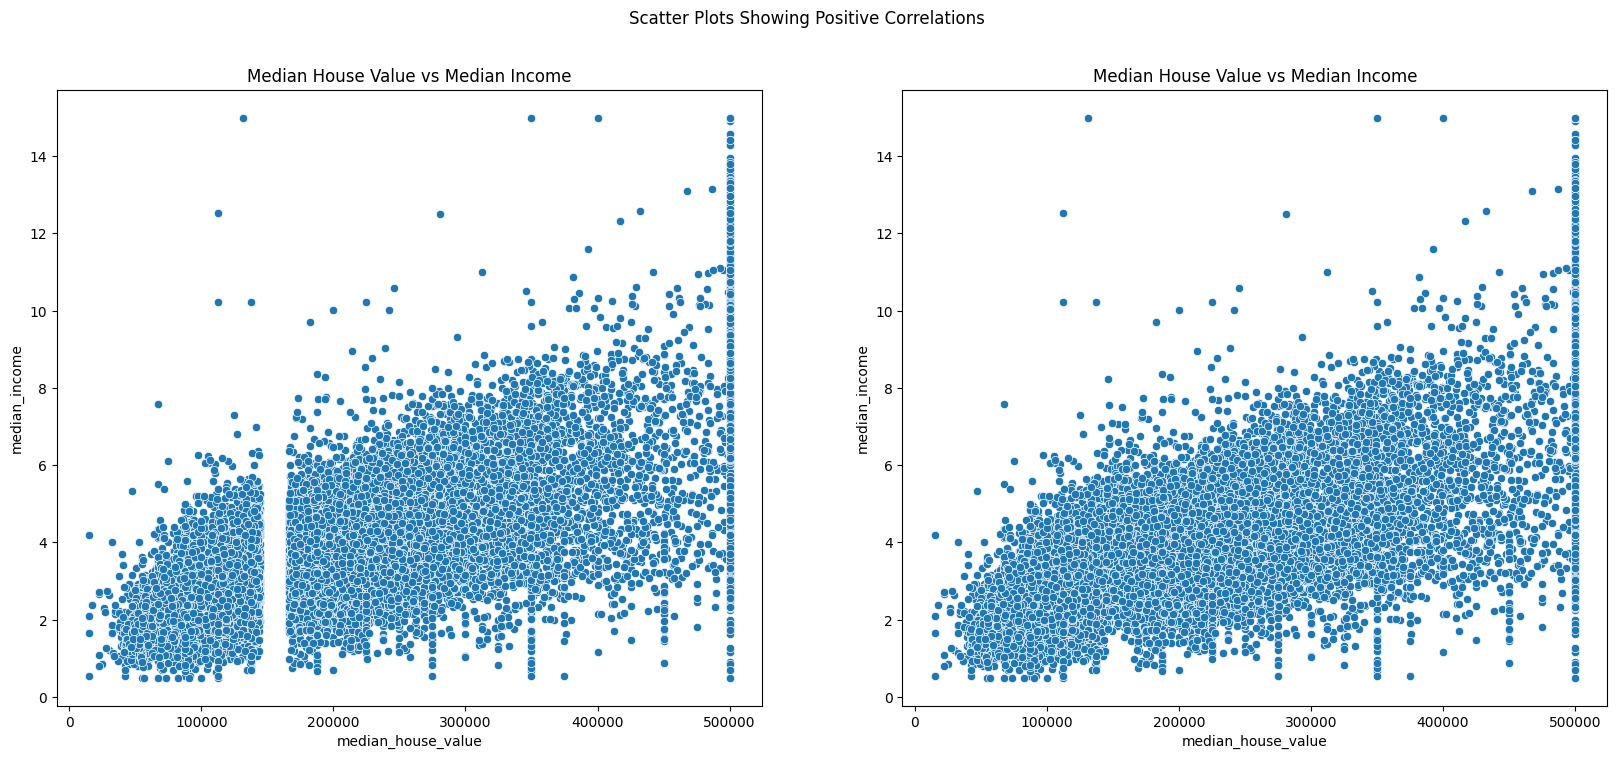

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Scatter Plots Showing Positive Correlations')
sns.scatterplot(ax=axes[0], data=houses_corrupted, x='median_house_value', y='median_income')
axes[0].set_title('Median House Value vs Median Income')

sns.scatterplot(ax=axes[1], data=houses_knn_imputed, x='median_house_value', y='median_income')
axes[1].set_title('Median House Value vs Median Income')

Above is a scatter plot visual representation of `median_house_value` and `median_income` before and after KNN imputation.

### MICE Imputation

Multivariate Imputation by Chained Equations (MICE) is a statistical method used to handle missing data. It will use multiple imputation techniques to fill in the missing data and then combine the results from multiple imputations to produce the final imputed dataset [14]. This is implemented using the IterativeImputer provided by sklearn.

In [96]:
# Referenced from [https://scikit-learn.org/1.5/modules/generated/sklearn.impute.IterativeImputer.html]
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Initilise MICE Imputer
mice_imputer = IterativeImputer(random_state=55, max_iter=10)
# These are the features with missing values that need to be imputed
columns_to_impute = ['median_income', 'housing_median_age', 'population']
# Creates a copy of the original dataframe so it isn't modified directly
houses_mice_imputed = houses_corrupted.copy()
# This performs Mice Imputation on the features with missing values
houses_mice_imputed[columns_to_impute] = mice_imputer.fit_transform(houses_mice_imputed[columns_to_impute])
# Displays the first 5 rows of the dataframe
houses_mice_imputed.head(15)

median_house_value  median_income  housing_median_age  total_rooms  \
0             452600.0       8.325200           41.000000        880.0   
1             358500.0       8.301400           21.000000       7099.0   
2             352100.0       7.257400           52.000000       1467.0   
3             341300.0       5.643100           52.000000       1274.0   
4             342200.0       3.846200           52.000000       1627.0   
5             269700.0       4.036800           52.000000        919.0   
6             299200.0       3.659100           52.000000       2535.0   
7             241400.0       3.120000           52.000000       3104.0   
8             226700.0       2.080400           42.000000       2555.0   
9             261100.0       3.691200           52.000000       3549.0   
10            281500.0       3.203100           31.055791       2202.0   
11            241800.0       3.270500           52.000000       3503.0   
12            213500.0       3.075000           52.000000       2491.0   
13            191300.0       2.673600           52.000000        696.0   
14            159200.0       3.416394           52.000000       2643.0   

    total_bedrooms   population  households  latitude  longitude  
0            129.0   322.000000       126.0     37.88    -122.23  
1           1106.0  2401.000000      1138.0     37.86    -122.22  
2            190.0   676.377297       177.0     37.85    -122.24  
3            235.0   713.920992       219.0     37.85    -122.25  
4            280.0   565.000000       259.0     37.85    -122.25  
5            213.0   413.000000       193.0     37.85    -122.25  
6            489.0  1094.000000       514.0     37.84    -122.25  
7            687.0  1157.000000       647.0     37.84    -122.25  
8            665.0  1206.000000       595.0     37.84    -122.26  
9            707.0  1551.000000       714.0     37.84    -122.25  
10           434.0   910.000000       402.0     37.85    -122.26  
11           752.0  1504.000000       734.0     37.85    -122.26  
12           474.0  1098.000000       468.0     37.85    -122.26  
13           191.0   345.000000       174.0     37.84    -122.26  
14           626.0  1212.000000       620.0     37.85    -122.26

Much like KNN we can see that MICE successfully imputed the missing NaN values that were present in `population`, `median_income`, and `housing_median_age`. We can check that all the values were imputed below.

In [97]:
# Code adapted from [https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset]
percent_missing = houses_mice_imputed.isnull().sum() * 100 / len(houses_mice_imputed)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

print(missing_value_df)

                    percent_missing
median_house_value              0.0
median_income                   0.0
housing_median_age              0.0
total_rooms                     0.0
total_bedrooms                  0.0
population                      0.0
households                      0.0
latitude                        0.0
longitude                       0.0


Once again, no missing values, MICE successfully filled in all missing values from `population`, `median_income`, and `housing_median_age`.

Text(0.5, 1.0, 'Median House Value vs Median Income')

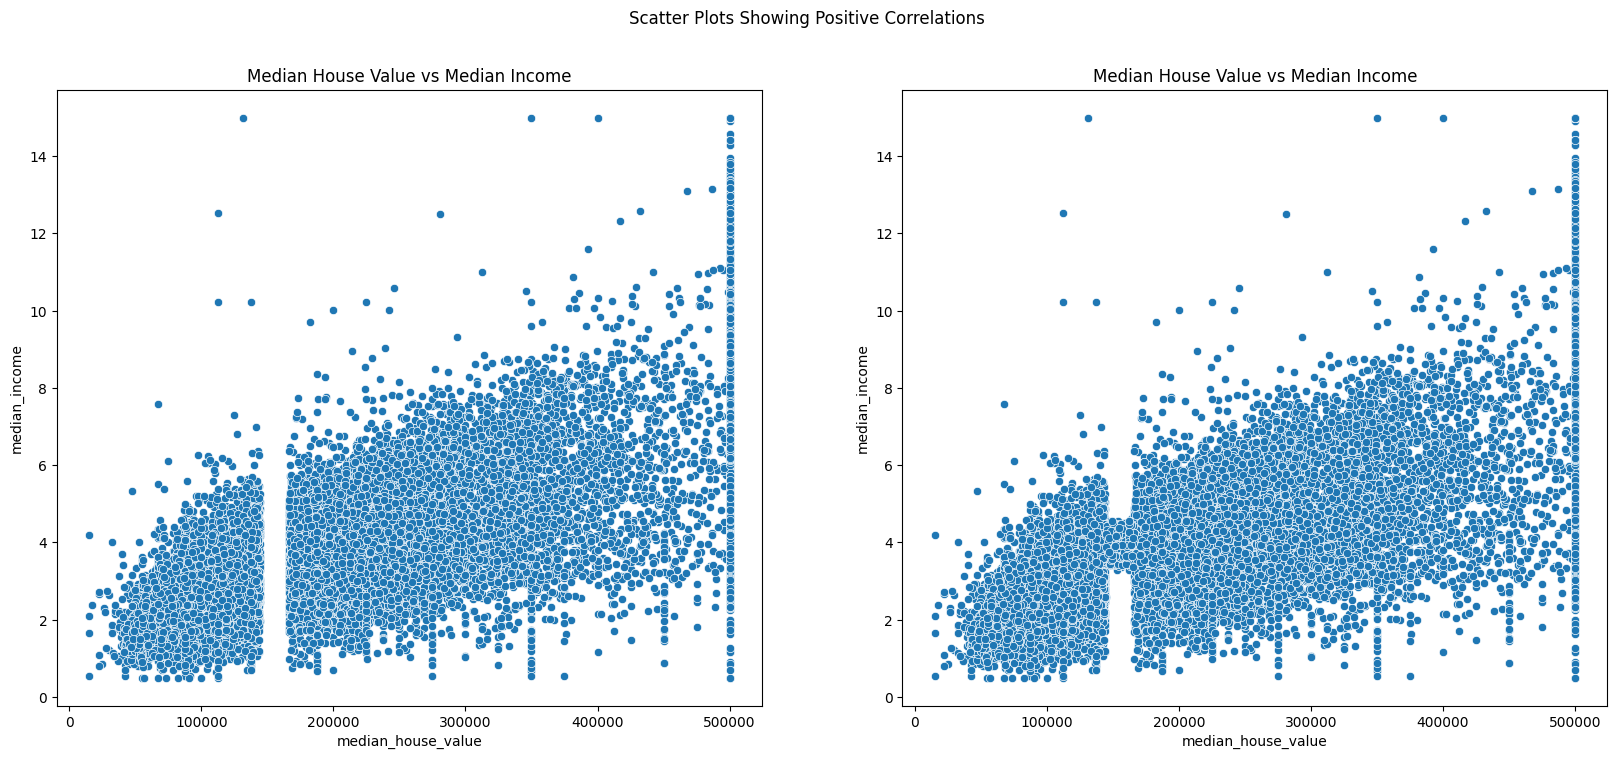

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Scatter Plots Showing Positive Correlations')
sns.scatterplot(ax=axes[0], data=houses_corrupted, x='median_house_value', y='median_income')
axes[0].set_title('Median House Value vs Median Income')

sns.scatterplot(ax=axes[1], data=houses_mice_imputed, x='median_house_value', y='median_income')
axes[1].set_title('Median House Value vs Median Income')

Above is a scatter plot visual representation of `median_house_value` and `median_income` before and after MICE imputation.

### Compare both imputed datasets feature distributions against each other and the non-imputed data

When comparing the imputed datasets and non-imputed feature distributions against each other we can use the `.describe()` method. This will give us the 5 number-summary for each dataset. I will only look at the 5 number-summary for the attributes that were initially missing values, this includes: `median_income`, `housing_median_age`, and `population`. The `.describe()` method will give us statistics such as mean, median, min, and standard deviation.

In [99]:
print("KNN 5 Number-Summary")
print(houses_knn_imputed[['median_income', 'housing_median_age', 'population']].describe())
print("MICE 5 Number-Summary")
print(houses_mice_imputed[['median_income', 'housing_median_age', 'population']].describe())
print("Original 5 Number-Summary")
print(houses[['median_income', 'housing_median_age', 'population']].describe())

KNN 5 Number-Summary
       median_income  housing_median_age    population
count   20640.000000        20640.000000  20640.000000
mean        3.897235           28.718919   1490.026348
std         1.888178           12.150253   1125.793240
min         0.499900            1.000000      3.000000
25%         2.604200           19.000000    865.000000
50%         3.562238           29.000000   1258.000000
75%         4.750000           37.000000   1802.000000
max        15.000100           52.000000  35682.000000
MICE 5 Number-Summary
       median_income  housing_median_age    population
count   20640.000000        20640.000000  20640.000000
mean        3.930997           28.490619   1475.102559
std         1.865219           11.959586   1116.253085
min         0.499900            1.000000      3.000000
25%         2.661800           19.000000    867.000000
50%         3.712135           29.160489   1251.116098
75%         4.679625           36.000000   1763.000000
max        15.000100  

Above we have computed the 5 number-summary for each dataset. Each data set shows different values when comparing the mean and standard deviation.

- Mean:
  - When looking at `median_income` KNN has a slightly lower value at `3.897235` compared to MICE at `3.930997`. KNN is closer to the original data set that has a value of `3.870671` although still higher. MICE slightly overestimates `median_income` the most compared to KNN.
  - It's a slightly different story when looking at the mean for `housing_median_age` and `population`. KNN shows higher values at `28.718919` (housing_median_age) and `1490.026348` (population) compared to MICE imputation with values at `28.490619` (housing_median_age) and `1475.102559` (population). The original data set mean for `housing_median_age` is `28.639486` which means that KNN slightly over-estimated whereas MICE slightly under-estimated. However, the values are very similar in the context and both imputation methods seemed to do a good job estimating the values.

- Standard Deviation:
  - KNN appears to have a higher standard deviation across all attributes compared to MICE, but lower across all features when compared to the original dataset.

In conclusion, the 5 number-summary is very close between all 3 data sets. MICE and KNN don't show any significant deviations from the original data set showing that both inputation methods were equally a good choice for data inputation. To further analyse the distributions of all features, we can use density plots.

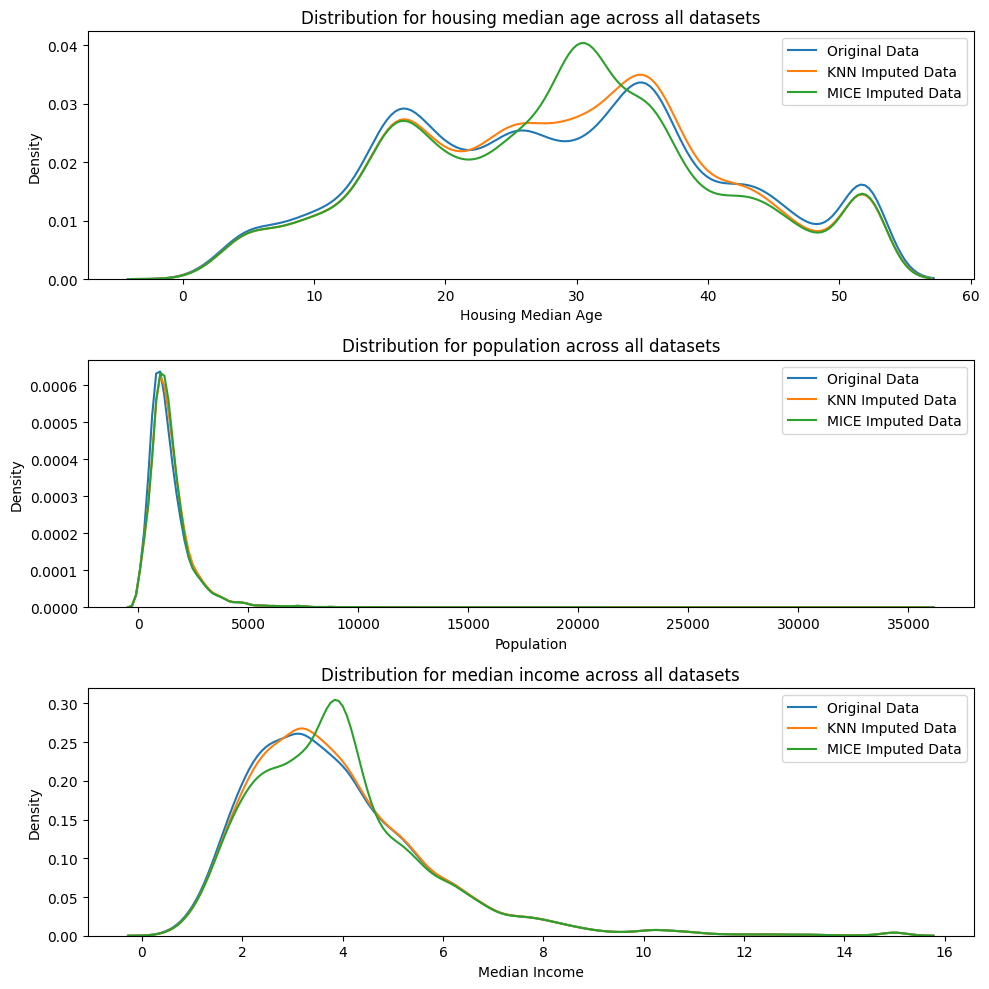

In [100]:
# Referenced from [https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8]
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

sns.kdeplot(ax=axes[0], data=houses['housing_median_age'], label='Original Data')
sns.kdeplot(ax=axes[0], data=houses_knn_imputed['housing_median_age'], label='KNN Imputed Data')
sns.kdeplot(ax=axes[0], data=houses_mice_imputed['housing_median_age'], label='MICE Imputed Data')
axes[0].set_title("Distribution for housing median age across all datasets")
axes[0].set_xlabel('Housing Median Age')
axes[0].legend()

sns.kdeplot(ax=axes[1], data=houses['population'], label='Original Data')
sns.kdeplot(ax=axes[1], data=houses_knn_imputed['population'], label='KNN Imputed Data')
sns.kdeplot(ax=axes[1], data=houses_mice_imputed['population'], label='MICE Imputed Data')
axes[1].set_title("Distribution for population across all datasets")
axes[1].set_xlabel('Population')
axes[1].legend()

sns.kdeplot(ax=axes[2], data=houses['median_income'], label='Original Data')
sns.kdeplot(ax=axes[2], data=houses_knn_imputed['median_income'], label='KNN Imputed Data')
sns.kdeplot(ax=axes[2], data=houses_mice_imputed['median_income'], label='MICE Imputed Data')
axes[2].set_title("Distribution for median income across all datasets")
axes[2].set_xlabel('Median Income')
axes[2].legend()

plt.tight_layout()
plt.show()

By reviewing all the density plots it gives us a better idea of which imputation method is best to use.

- Housing Median Age:
  - Both KNN and MICE deviate from the original data, but it is more prevalent in MICE. MICE seems to have a higher peak that deviates more than KNN, therefore KNN seems like the better choice for this.

- Population:
  - When looking at the population KNN and MICE equally match the original dataset. There are no significant differences from the original dataset. Therefore, either KNN or MICE is a good option for the population.

- Median Income:
  - It is a similar story with MICE when comparing it to housing median income. It seems to deviate from the original data set by having a higher peak whereas KNN follows the original data much more closely, therefore KNN would be a better option for this feature.

Overall, KNN seems to follow the original data much more closely, especially on `median_income` and `housing_median_age`. Therefore, KNN would be the better option when choosing which imputation method to use.

### Regression Models on all datasets

---


- `houses`
- `houses_mice_imputed`
- `houses_knn_imputed`
- Use regression models to predict house median value
- Compare regressors of non-imputed data against imputed datas
- Note: If you're struggling to compare against the original dataset focus on comparing the two imputed datasets against each other


When deciding what type of regression model to choose when predicting `house_median_price` I decided to go with Linear Regression for the following reasons:
- Linear Regression is good at prediction problems
- Very simple and interpretable
- Allows me to use performance metrics such as $R^2$ score and RMSE.

First I decided to create a function to test each each dataset independently. This allows for reusable code which makes it easier when working on multiple datasets (MICE-Imputed, KNN-Imputed, and Original datasets).

Next, I added variables to take in the predictors and responses, this allows flexibility when working on diffferent datasets. Following on from that I initilise the `LinearRegression()` model which is effective for this as it's good at predicting, very simple. and easy to interpret.
- Predicators: This stores the features used to predict the response
- Response: This will identify the target variable to be predicted.

Next, I split the data into training and test sets. The test size was set at 0.2. This means 20% of the data will be used for testing while the other 80% will be used for training.

Next, I fit the model with `reg.fit(X_train, y_train)`. This trains the model using the training dataset. After training, I used the trained model to make predictions on the data with `reg.predict(X_test)`. This will test the model to see how well it predicts on unseen data by comparing predicted values to the actual values in the dataset.

Lasty I calculate the $R^2$ and RMSE score and print them out.


In [101]:
# Method adapted from [https://colab.research.google.com/drive/1O61ow4kNIsuoyLBmgayeQy7IXb2GBg42#scrollTo=qUgRaYgpaos0]
def fit_model(data, preds, response, dataset):
    X = data[preds]
    y = data[response]

    reg = LinearRegression()


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'RMSE {dataset}: {rmse:.3f}')
    print(f'R2 Score {dataset}: {r2:.3f}\n')



In [102]:
houses_corrupted_cleaned = houses_corrupted.dropna()
# These are the predictors used to predict the target variable
pred = ['median_income', 'housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
# This is the target variable we are trying to predict
response = 'median_house_value'

# Fit the models Params(data, predictors, response, dataset used)
fit_model(houses, pred, response, "Original")

fit_model(houses_knn_imputed, pred, response, "KNN")

fit_model(houses_mice_imputed, pred, response, "Mice")

RMSE Original: 70132.421
R2 Score Original: 0.625

RMSE KNN: 71697.621
R2 Score KNN: 0.608

RMSE Mice: 71607.799
R2 Score Mice: 0.609



#### Original Data:
The original data contained no imputed or missing values. It performed with an RMSE of 70132.421 and an R² of 0.625. This is the best performing out of the three, with the model explaining 62.5% of the variance in the target (`median_house_value`) variable that is explained by the independent variables (predictors). RMSE is also quite low considering the range of the dataset's values (14,000-501,000). An RMSE of 70132.421 suggests that, on average, the predictions deviate by approximately $70132.421.


Since the original dataset was complete and not reliant on inputted values, it allowed it to capture better relationships between the features. This leads to a more reliable predictive performance.


#### K-Nearest Neighbors Imputed:
The KNN-Imputed dataset performed with an RMSE of 71697.621 and an R² of 0.608. This performance is the worst out of the three. This shows that the KNN Imputation method may have introduced some inaccuracies which negatively impacted the model's predictive performance. The RMSE is 1565.2 more than the original dataset, meaning the predictions deviate more significantly when compared to the original dataset. This is to be expected as KNN is using **predicted** values, unlike the original dataset.


#### MICE-Imputed:
MICE similarly to the KNN-Imputed data wasn't as strong at predicting as the model with the original data. However, with an RMSE of 71607.799 and R² of 0.609 it shows a slight improvement from the KNN-Imputed data. The RMSE has a 1475.378 increase over the original dataset. Much like KNN, the predictions deviate more significantly than the original dataset. However, it doesn't deviate as much as KNN which deviates 89.822 more than MICE. Although better than KNN-Imputation it still has some inaccuracies which affect the predictive performance of the model.


#### Conclusion
In conclusion, when comes to predicting `median_house_value` the original dataset outperformed both KNN and MICE-Imputed datasets. This shows the importance of data integrity when using predictive as its completeness allows it to capture more accurate relationships. Although MICE and KNN didn't show a large decline in predictive accuracy, it still shows the inconsistencies of using imputed datasets and how they can affect the model's predictive performance.

## 4. Conclusions & Thoughts

### Anomaly detection


#### Robust Z-Score Pros and Cons

Pros:

- Robust Z-Score was extremely easy to implement, I just needed to follow the formula given to implement it, and works well on skewed data such as this dataset.

Cons:

- One of the cons of Robust Z-Score is that it removes a significant chuck of data which could be useful/relevant for further analysis.

- With Robust Z-Score, if the dataset is too small it will behave strangely, in fact, if the dataset has fewer than 12 values in it then it won't detect any outliers at all [5].

#### Isolation Forest Pros and Cons

Pros:
- Similar to Robust Z-Score it was very simple to implement and had very few parameters to fine-tune.

- It has high speed and efficiency, even on large datasets and also requires a small amount of computation resources[15]. This allows us to quickly analyse the data set to quickly detect outliers.

Cons:
- Can sometimes give false positives as it has no prior knowledge of the data. This is because it is an unsupervised method [15]. This can increase the likelihood of incorrectly assigning a data point as an outlier.

- Another con stems from it not being able to always identify "one-of-a-kind" anomalies. Therefore, if an anomaly is unique or only occurs once the Isolation forest might not capture it [15].

#### Challenges with anomaly detection

I found anomaly detection to be the hardest part of the coursework and faced a lot of challenges when working through this section. I will outline some of the challenges faced

- Implementing Random Forest.
  - Initially, when it came around to implementing Isolation Forest, I wasn't entirely sure how to implement it and the meaning of different parameters such as the `contamination` parameter. Luckily I came across various articles that explained it to me.
  - Additionally, I came across a useful YouTube video that had a step-by-step guide on how to implement it (Referenced in the code).

- Setting the correct Threshold for Robust Z-Score.
  - Initially, when calculating the Robust Z-Score I was aware that I needed to set a threshold for the score. I was aware I had to set the value either at $z_i$ > 2.5, 3 but I wasn't sure which was the better option at first. I experimented with both thresholds where $z_i >$ 2.5 gave me 10197 anomalies and $z_i>$ 3 gave me 7064 anomalies. I didn't want to be too strict with my anomaly detection therefore I decided to go with $z_i > $ 3.


### Imputation

#### KNN pros and cons

Pros:
- KNN takes into account relationships and patterns of the data to calculate the values for imputation [16]. Therefore, when working with multivariate data such as in this case it is a good choice.
- KNN is also 'non-parametric', which means that it makes no assumptions about the data set it is imputing on, which makes it good for various types of datasets [16].

Cons:

- KNN requires you to fine-tune the `n_neighbors` parameter. This can be time-consuming, and the value will vary from data set to data set. The imputation results may not be as accurate depending on the neighbors selected for a particular data set, therefore, spending time finding the perfect amount of nearest neighbours.
- KNN imputation can be slow for large datasets. This is because it will need to calculate the distance between every data point and its nearest neighbours [17]

####MICE pros and cons

Pros:
- MICE is very effective when it comes to imputing data sets with a high amount of missing values. It does this by creating multiple imputations through an iterative process, therefore it is an ideal choice when dealing with incomplete data [18].
- Additionally, MICE also preserves the natural variability and relationships within the data [18], this means that values imputed will reflect the patterns and relationships already within the dataset.
- Doesn't require any fine-tuning of parameters, therefore it is very easy and simple to implement.

Cons:
- MICE is very computationally intensive, it requires a lot of computational resources and time [18]. This is down to the large amount of iterations it needs to do when imputing values which might take the model longer to converge. Therefore on large data sets with many missing values, it might take much longer to run.

#### Challenges with Imputation



During imputation, I came across a couple different challenges, one of them being parameter tuning for the number of neighbours to use for KNN. Initially, I tried a number of different values and then compared how the results looked on the scatter plot I created to visualise the results. The different values included **4**, **5**, **10**, and then I stopped at **15**. I decided to go with 4. I made this decision as it visually looked like the best match on the scatter plot for the large amount of data that was missing.

Additionally, I struggled to determine how many iterations to run with MICE. I initially conducted some research to determine what the best max iterations were and then I tried different values myself. Initially I tried **5**, then **10**, and finally **15**. I decided to go with 10, this was sufficient for this dataset and seemed to be still very accurate when conducting my feature distributions.

## References:

[1] “2.7: Skewness and the Mean, Median, and Mode,” Statistics LibreTexts, Jul. 28, 2023. https://stats.libretexts.org/Courses/Los_Angeles_City_College/Introductory_Statistics/02%3A_Descriptive_Statistics/2.07%3A_Skewness_and_the_Mean_Median_and_Mode (accessed Nov. 01, 2024).

[2] Stephanie, “Bimodal Distribution: What is it?,” Statistics How To, Jul. 29, 2013. https://www.statisticshowto.com/what-is-a-bimodal-distribution/ (accessed Nov. 01, 2024).

[3] I. Dixon, “Predictive Analytics,” ReCap, Oct. 07, 2024. https://recap.cloud.panopto.eu/Panopto/Pages/Viewer.aspx?id=7172bc47-4225-4cb7-9f6d-b201013a7eee (accessed Nov. 03, 2024).

[4] L.-H. Hsu, “Exploring Outlier Handling Techniques: A Comparative Analysis of Isolation Forest…,” Medium, Mar. 26, 2024. https://medium.com/@hsu.lihsiang.esth/exploring-outlier-handling-techniques-a-comparative-analysis-of-isolation-forest-0b4836e215b8 (accessed Nov. 09, 2024).

[5] “Modified Z-Score,” Oracle Help Center. https://docs.oracle.com/en/cloud/saas/planning-budgeting-cloud/pfusu/insights_metrics_MODIFIED_Z_SCORE.html (accessed Nov. 13, 2024).

[6] “Local Outlier Factor - (Collaborative Data Science) - Vocab, Definition, Explanations | Fiveable,” Fiveable.me. https://fiveable.me/key-terms/reproducible-and-collaborative-statistical-data-science/local-outlier-factor (accessed Nov. 07, 2024).

[7] “Outlier detection with Local Outlier Factor (LOF),” scikit-learn. https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html (accessed Nov. 07, 2024).

[8] “Local outlier factor,” GeeksforGeeks, May 06, 2022. https://www.geeksforgeeks.org/local-outlier-factor/ (accessed Nov. 08, 2024).

[9] Shubham Sangole, “Understanding Local Outlier Factor (LOF) for Anomaly Detection: A Comprehensive Guide with Python Implementation,” Medium, May 18, 2024. https://blog.stackademic.com/understanding-local-outlier-factor-lof-for-anomaly-detection-a-comprehensive-guide-with-python-05b2845d92c2 (accessed Nov. 10, 2024).

[10] “Looking for global and local outliers—ArcMap | Documentation,” desktop.arcgis.com. https://desktop.arcgis.com/en/arcmap/latest/extensions/geostatistical-analyst/looking-for-global-and-local-outliers.htm (accessed Nov. 12, 2024).

[11] I. Dixon, “Newcastle University - Canvas Login,” Instructure.com, 2024. https://ncl.instructure.com/courses/55046/pages/lecture-3?module_item_id=3511620 (accessed Nov. 14, 2024).

[12] “Learn about the common challenges in detecting anomalies with machine learning and how to solve them with data cleaning, feature engineering, model evaluation, model explanation, model deployment, and model ethics.,” Linkedin.com, Oct. 17, 2023. https://www.linkedin.com/advice/1/what-most-common-challenges-detecting-anomalies-9nwye (accessed Nov. 14, 2024).

[13] K. S. Htoon, “A Guide To KNN Imputation,” Medium, Jul. 03, 2020. https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e (accessed Nov. 15, 2024).

[14] B. Soni, “Topic:9 MICE or Multivariate Imputation with Chain-Equation,” Medium, Feb. 27, 2023. https://medium.com/@brijesh_soni/topic-9-mice-or-multivariate-imputation-with-chain-equation-f8fd435ca91 (accessed Nov. 15, 2024).

[15] F. Leibowich-Beker, “Assessing the Pros and Cons of Isolation Forest for ERP Transactions,” www.linkedin.com, Feb. 13, 2023. https://www.linkedin.com/pulse/assessing-pros-cons-isolation-forest-erp-transactions-fernando/ (accessed Nov. 16, 2024).

[16] “KNN Models,” Deepchecks. https://www.deepchecks.com/glossary/knn-models/ (accessed Nov. 16, 2024).

[17] B. Gupta, “Dealing with Unclean Data - Imputing Missing Values - Scaler Topics,” Scaler Topics, May 04, 2023. https://www.scaler.com/topics/machine-learning/missing-value-in-machine-learning/ (accessed Nov. 16, 2024).

[18] T. in Data, “Multiple Imputation with Chained Equations (MICE) - what is it? - Train in Data’s Blog,” Train in Data’s Blog, Jul. 26, 2024. https://www.blog.trainindata.com/multiple-imputation-with-chained-equations-mice-what-is-it/ (accessed Nov. 16, 2024).